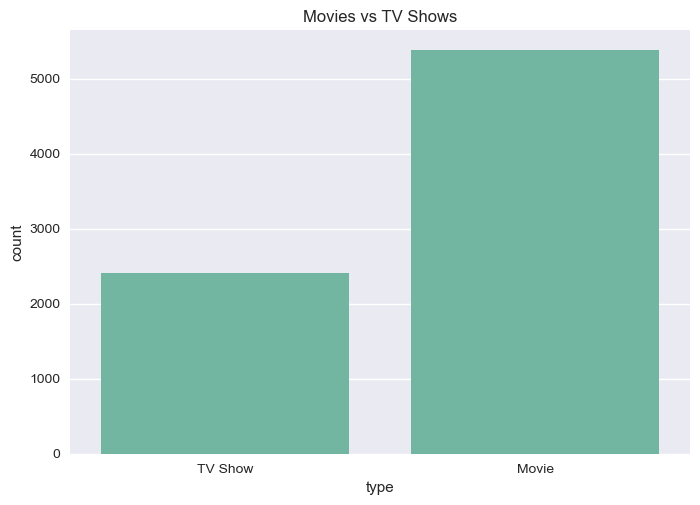

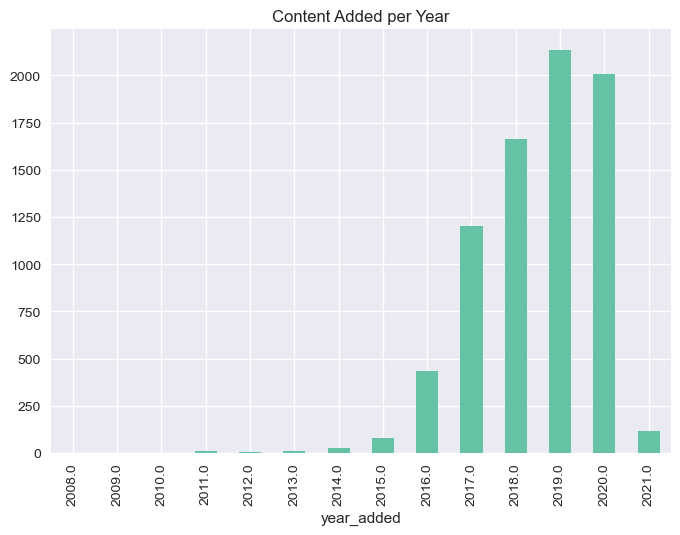

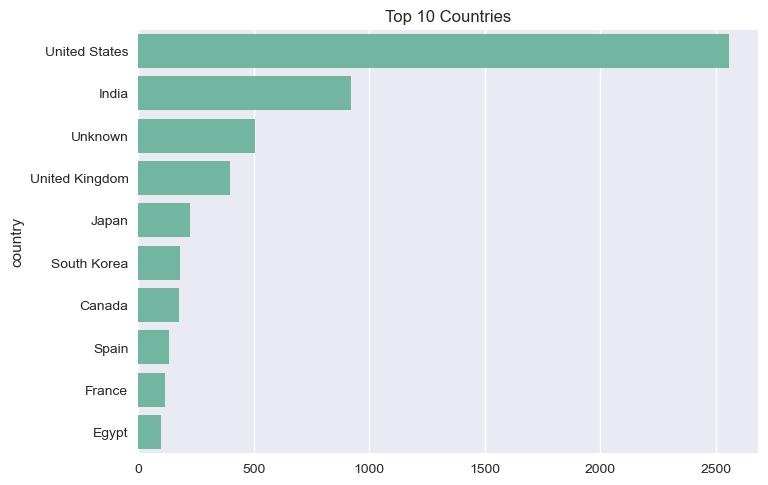

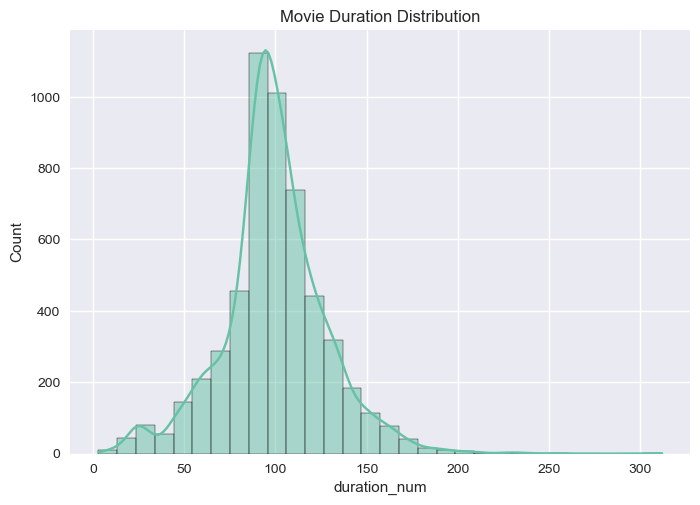

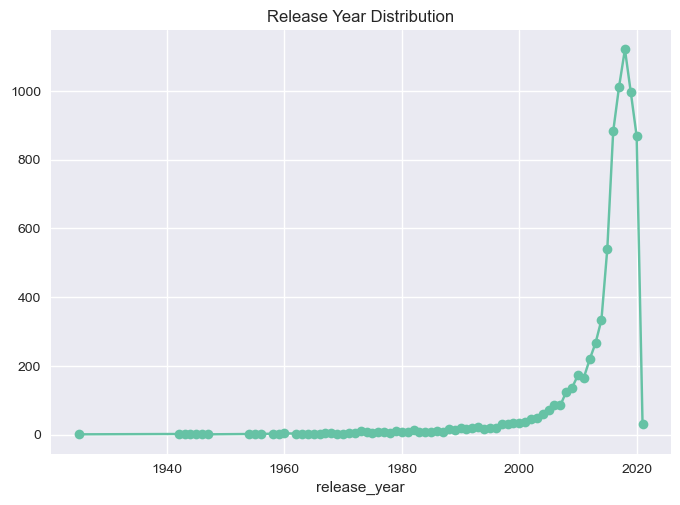

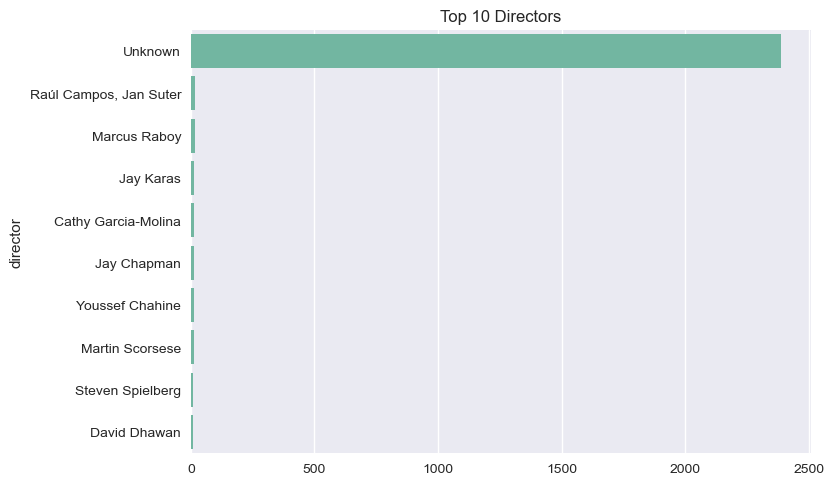

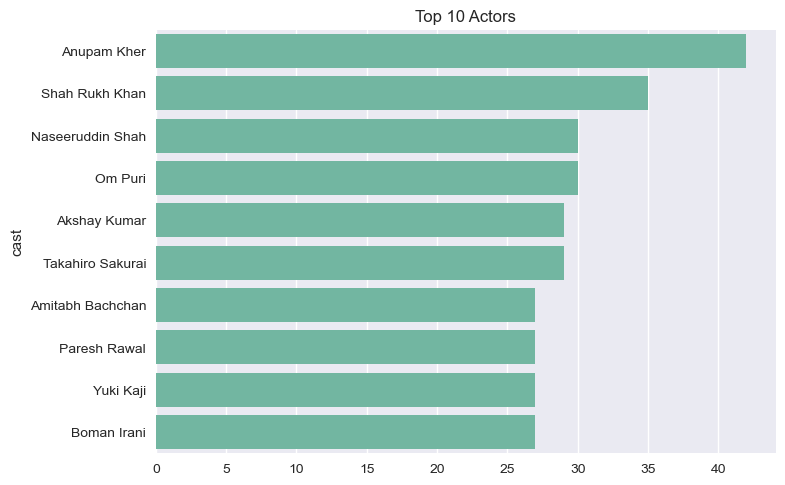

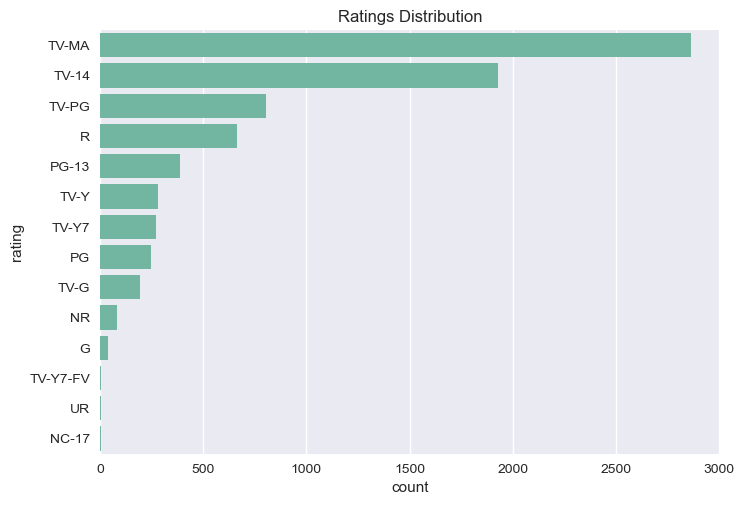

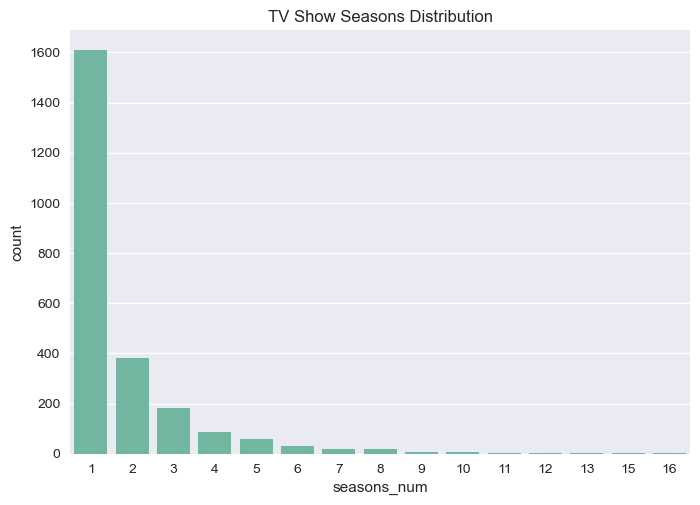

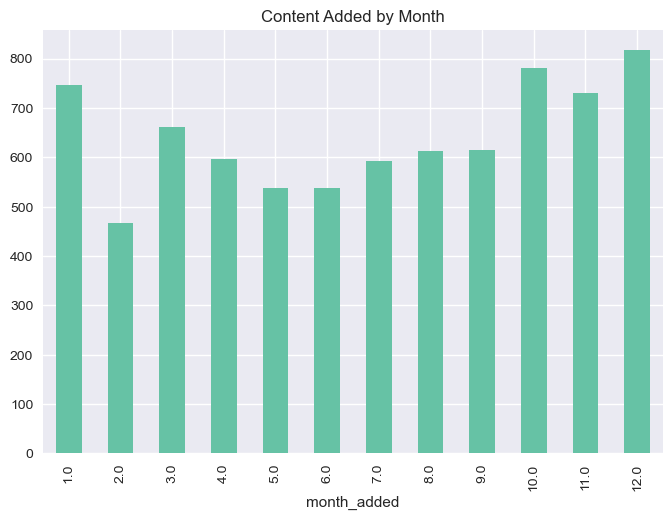

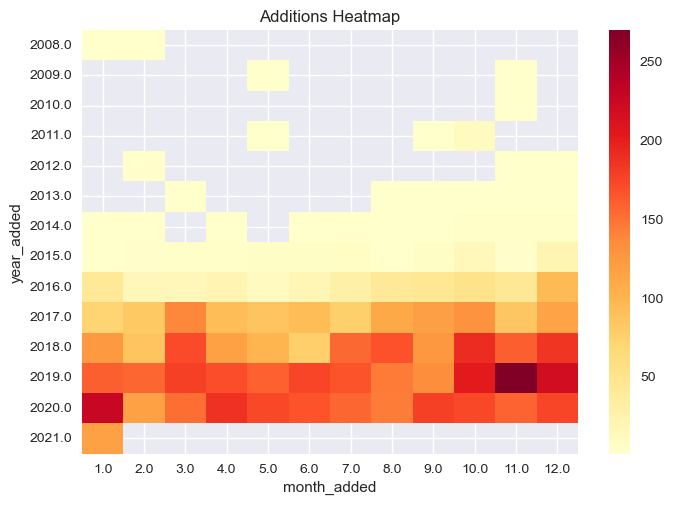

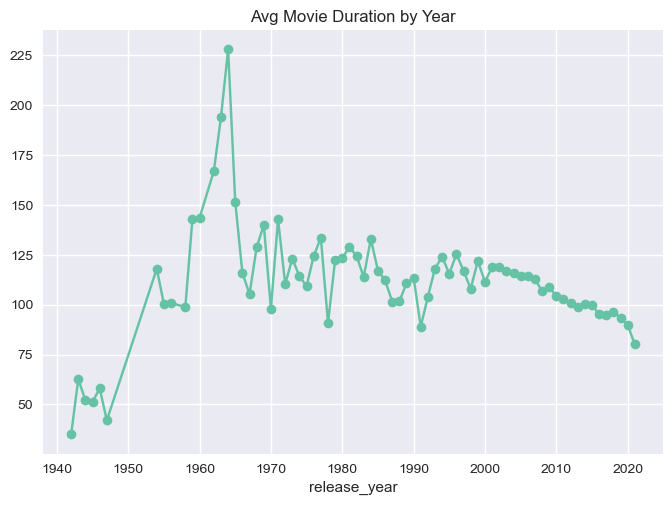

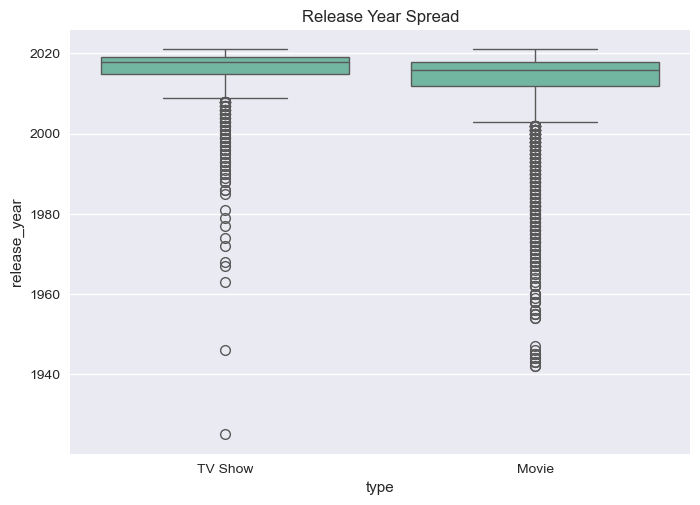

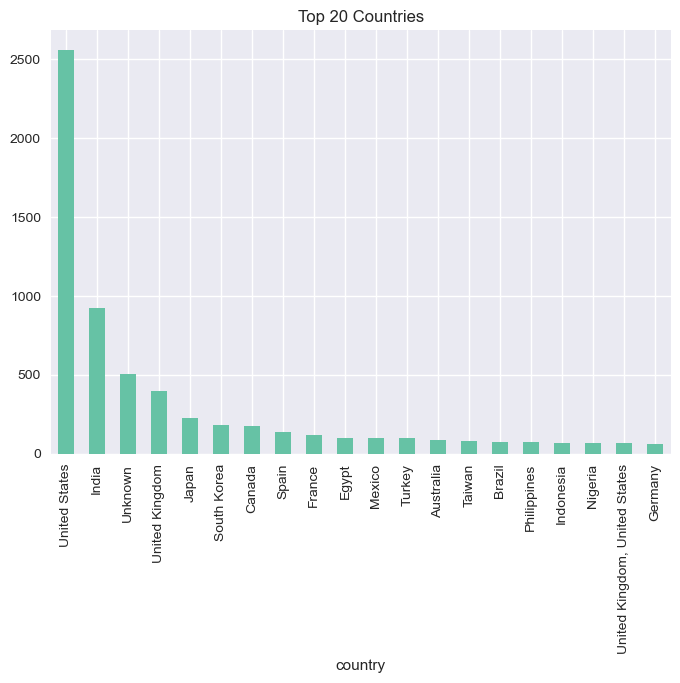

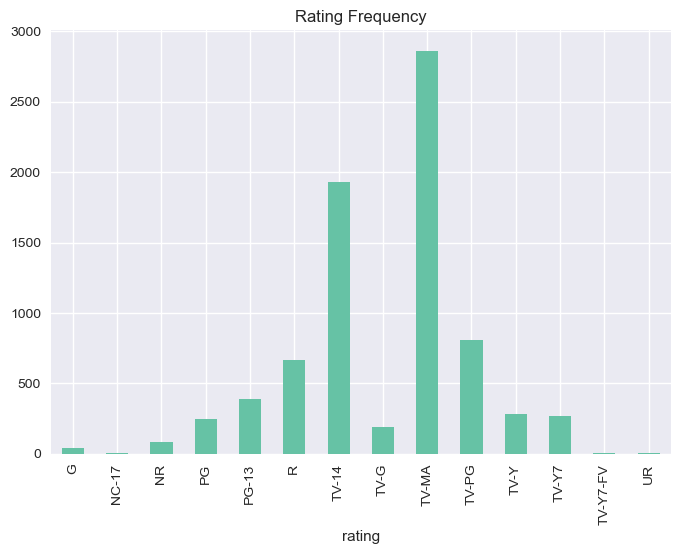

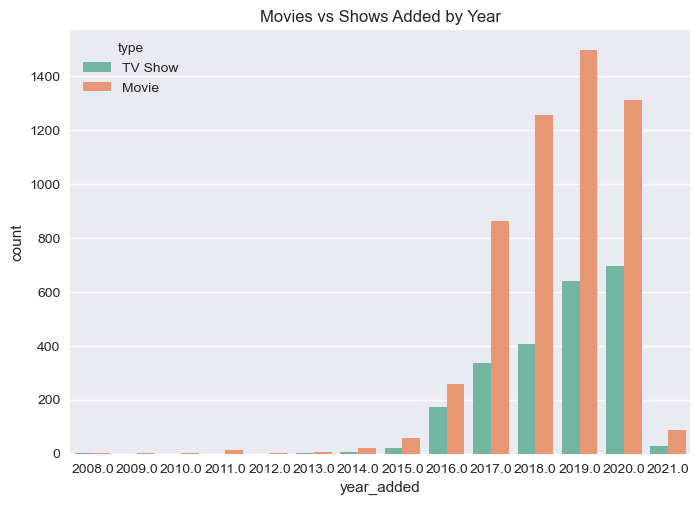

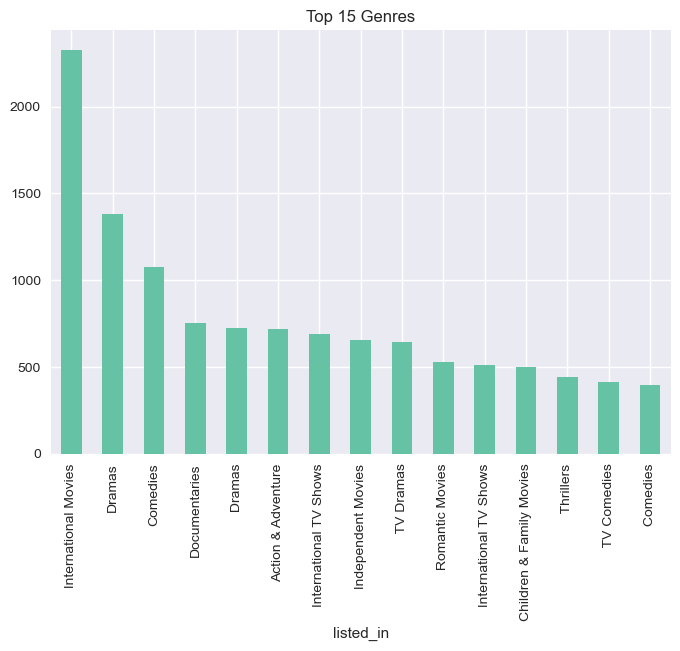

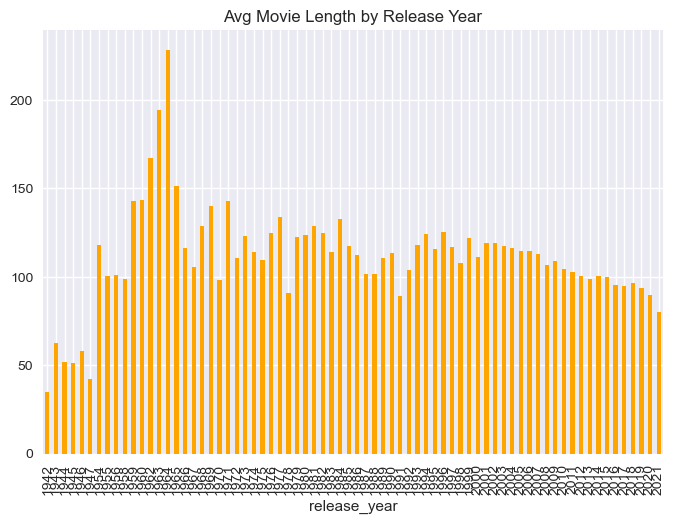

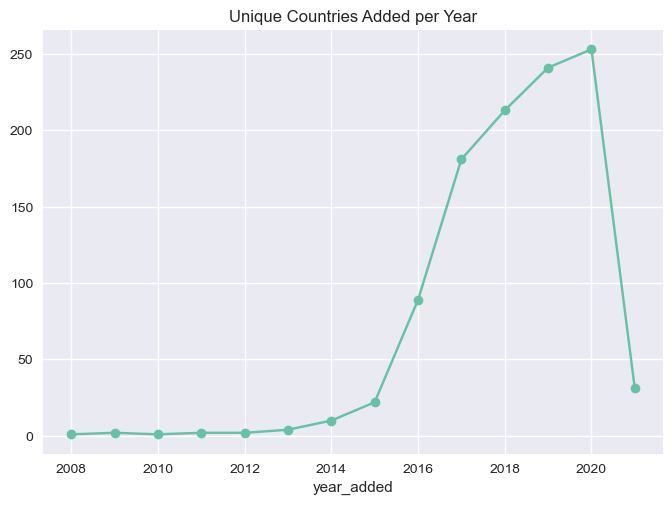

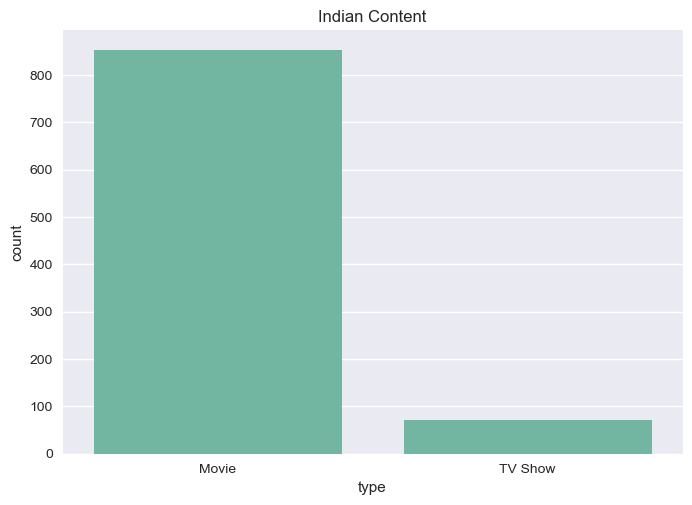

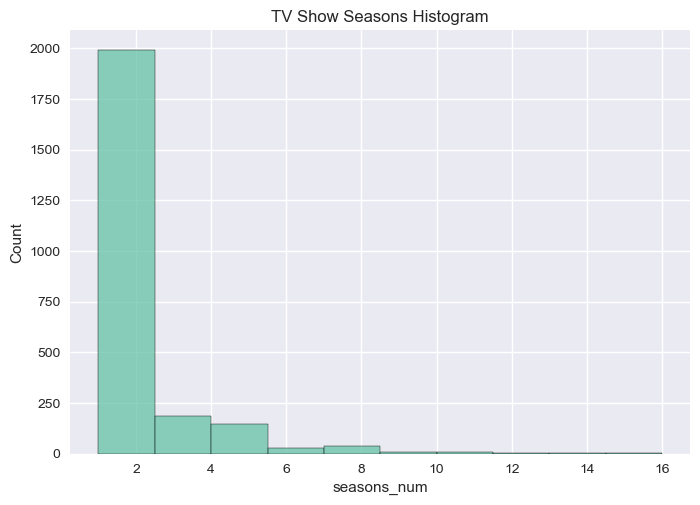

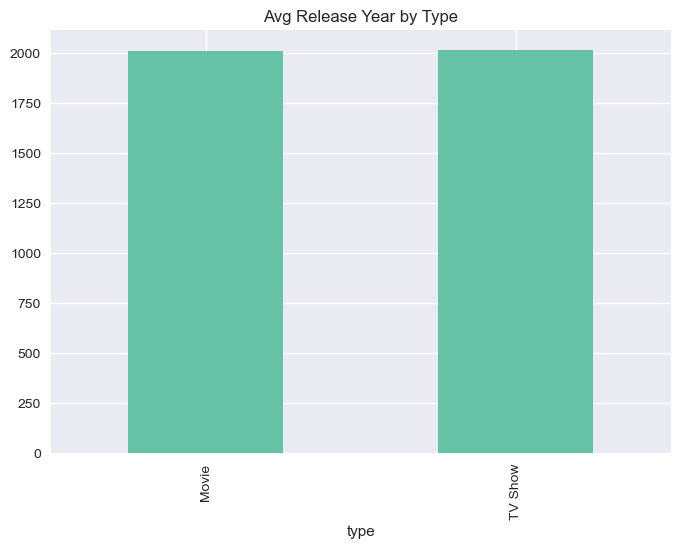

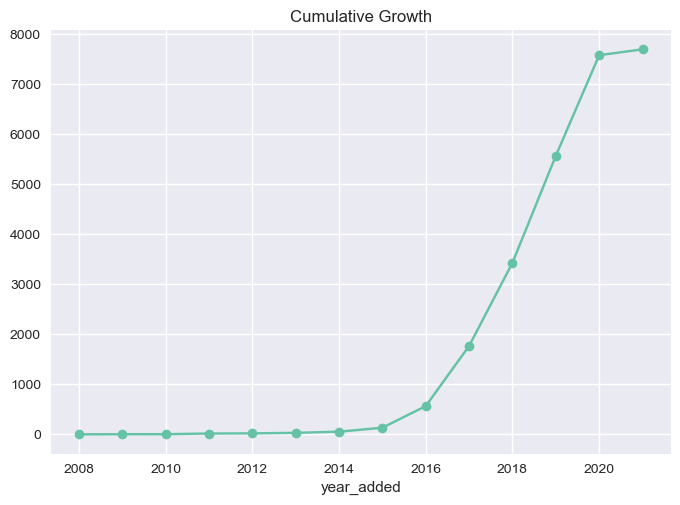

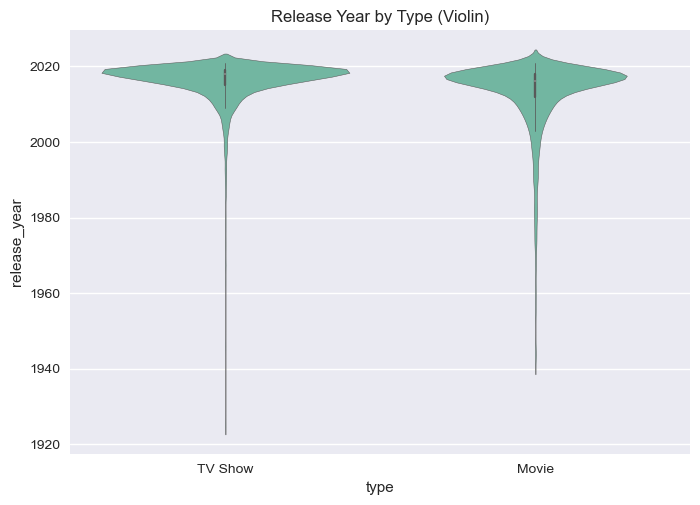

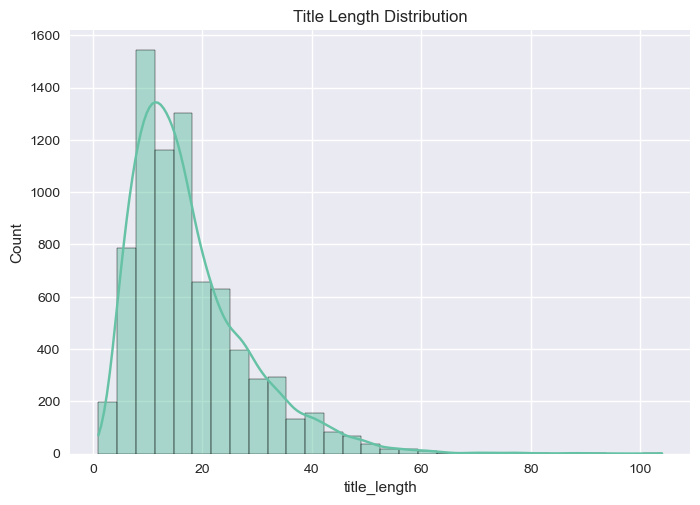

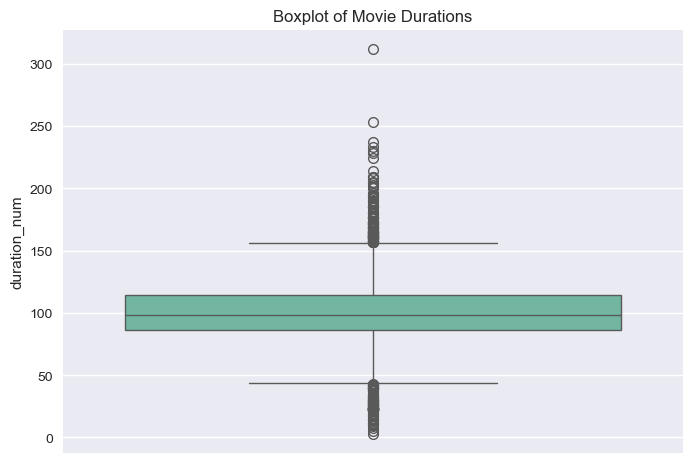

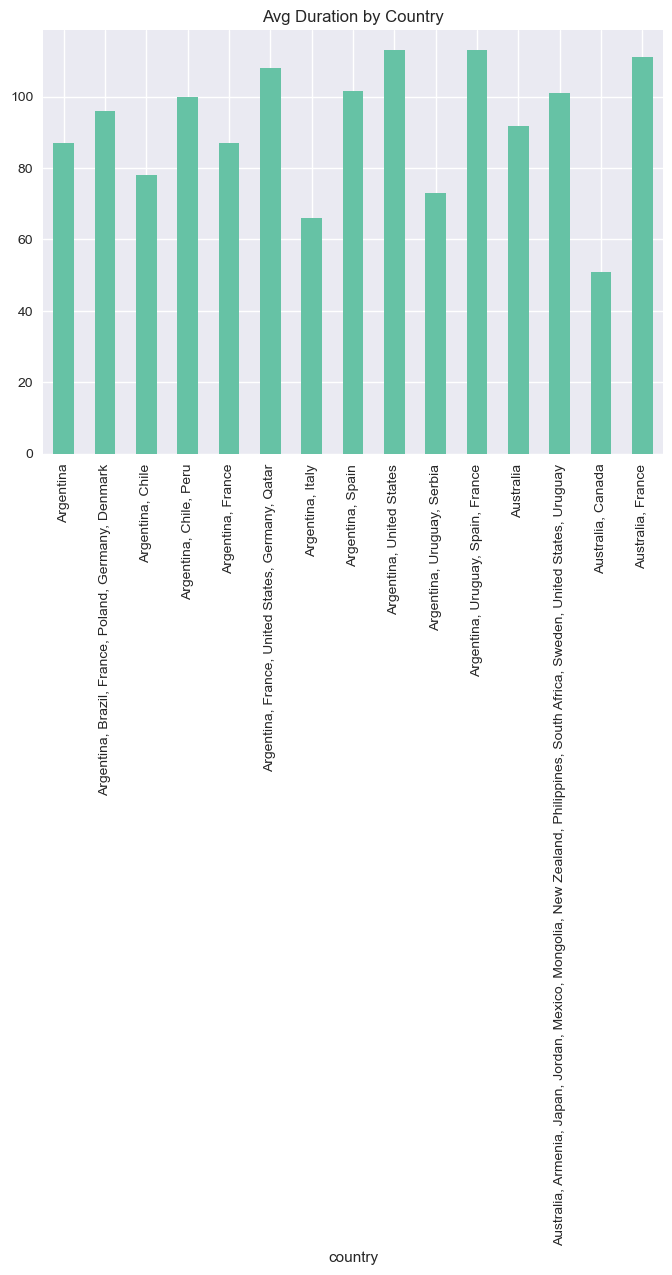

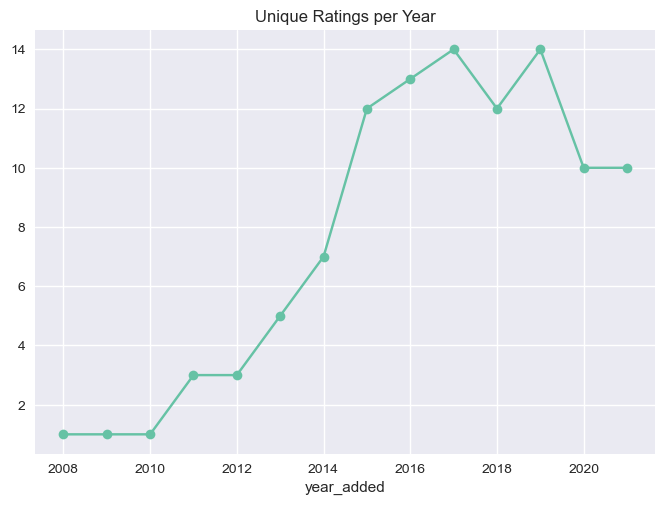

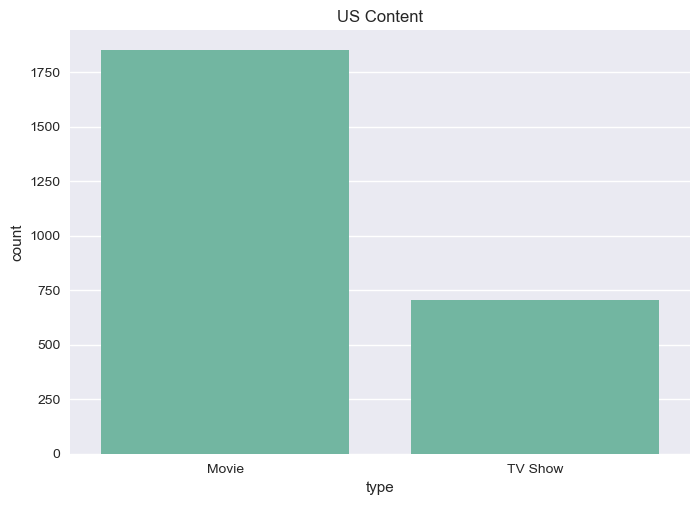

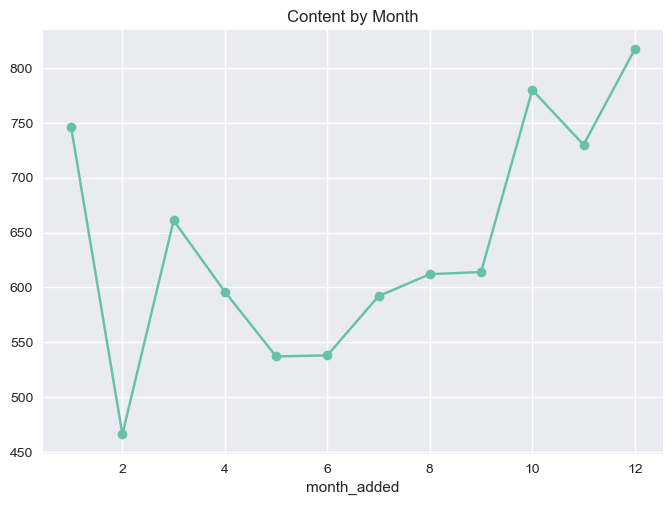

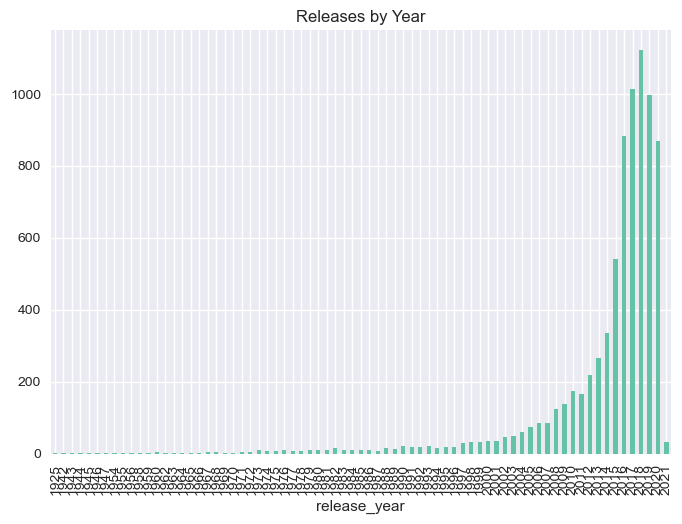

<Figure size 800x550 with 0 Axes>

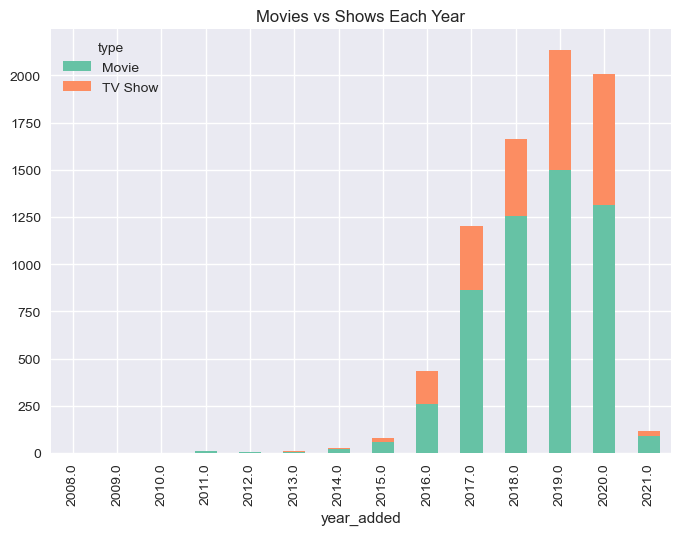

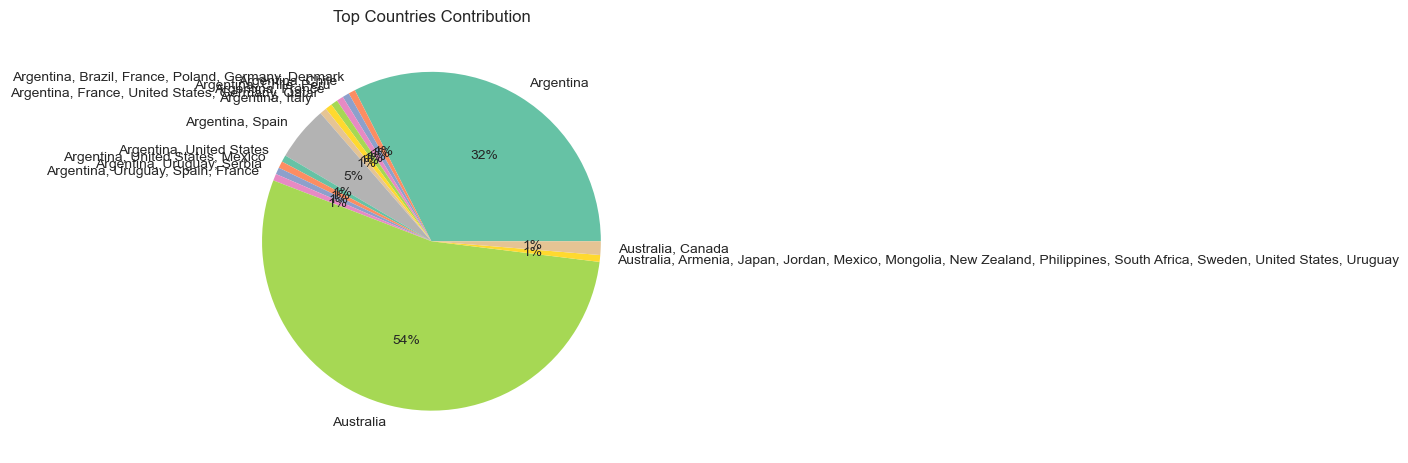

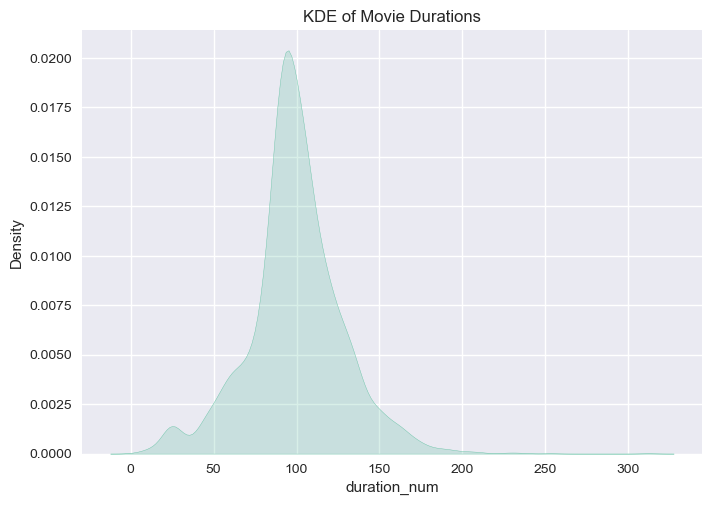

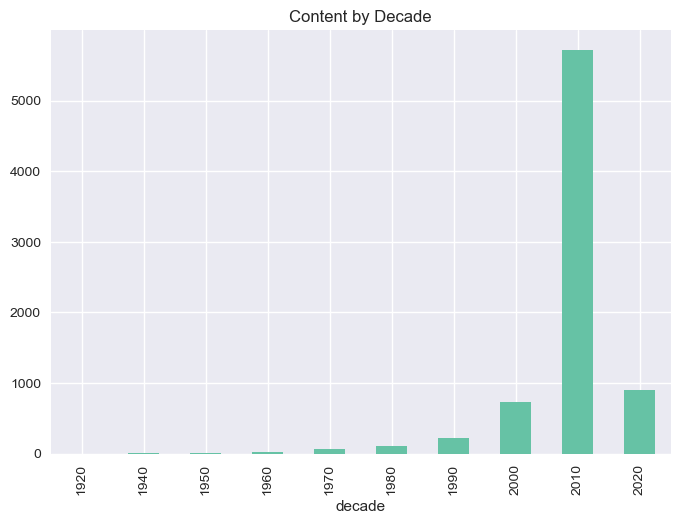

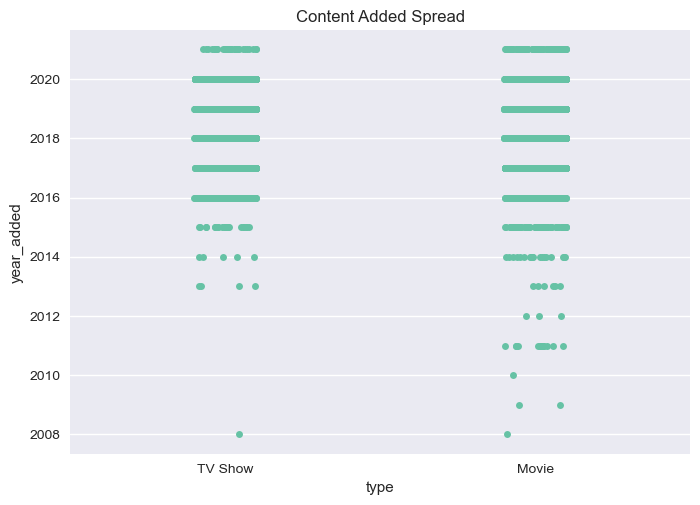

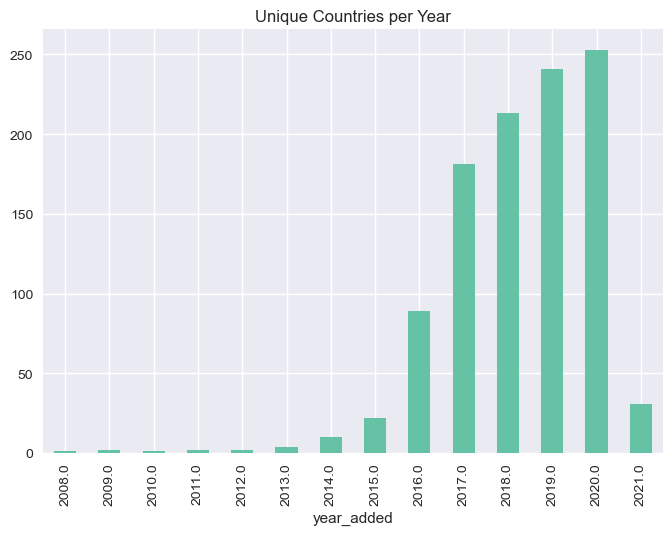

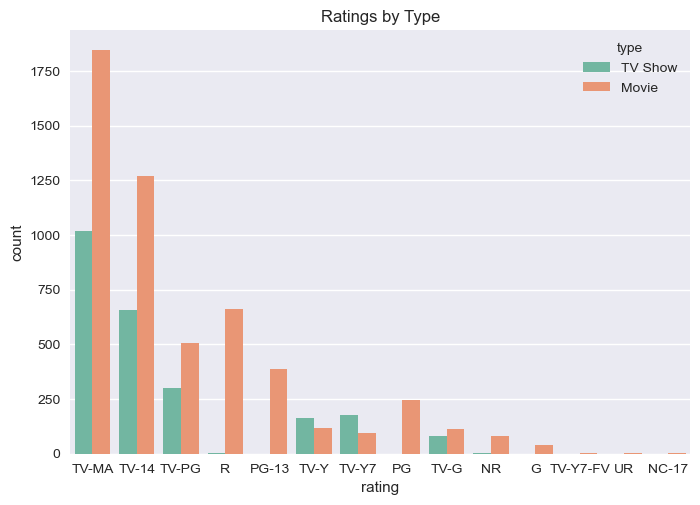

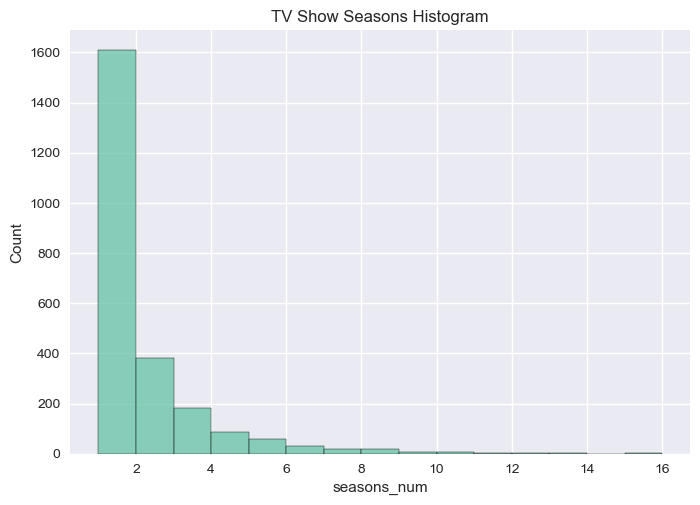

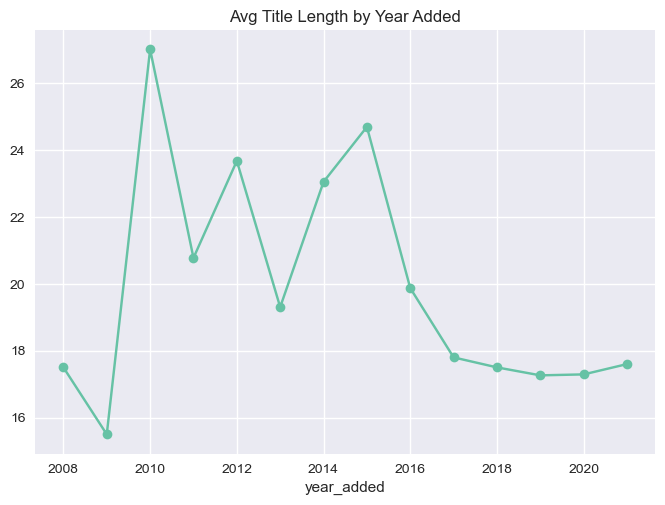

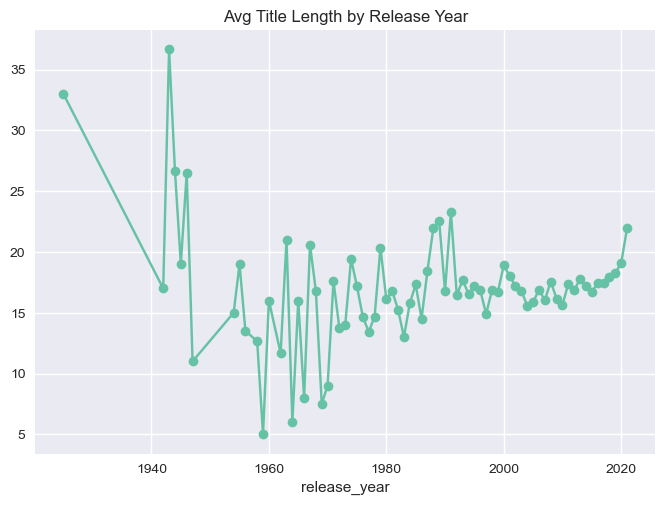

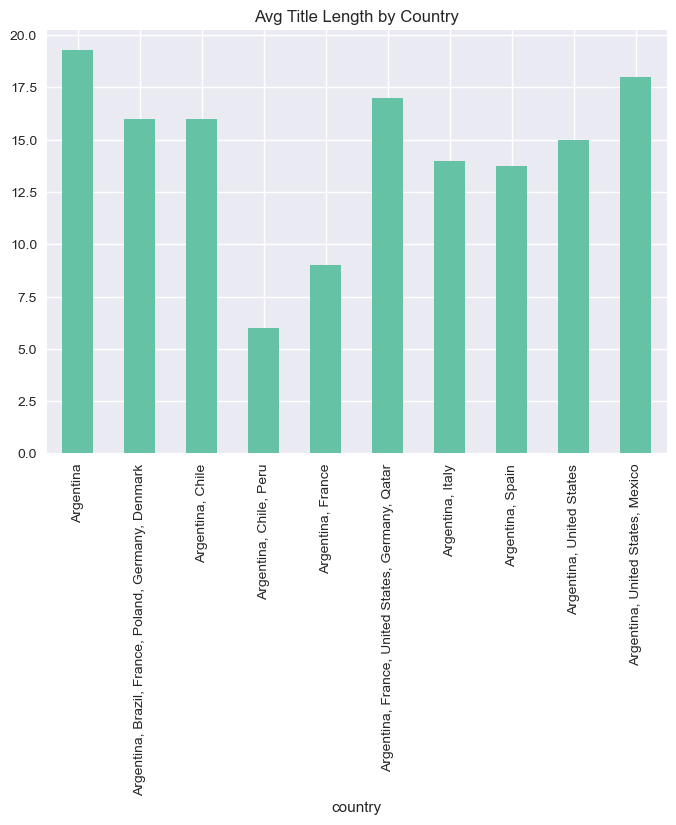

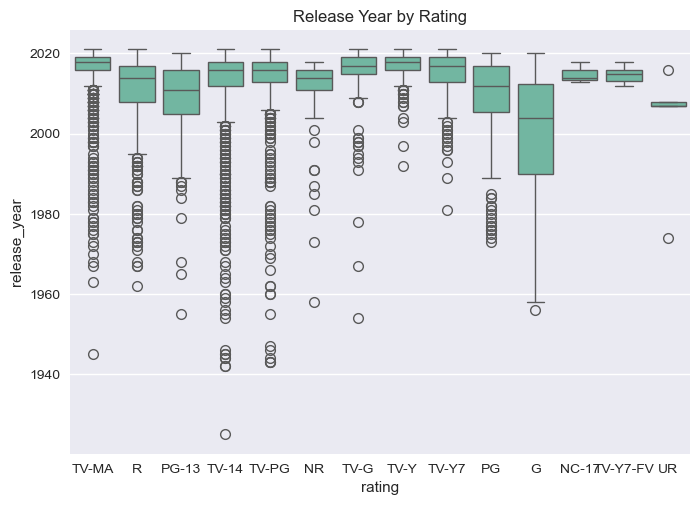

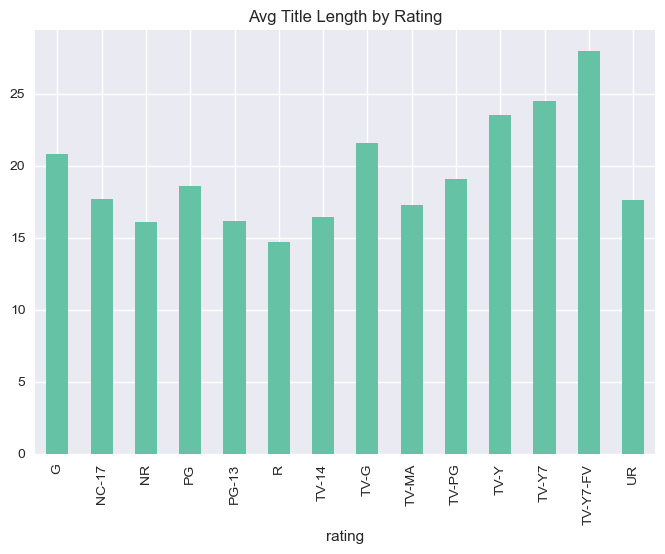

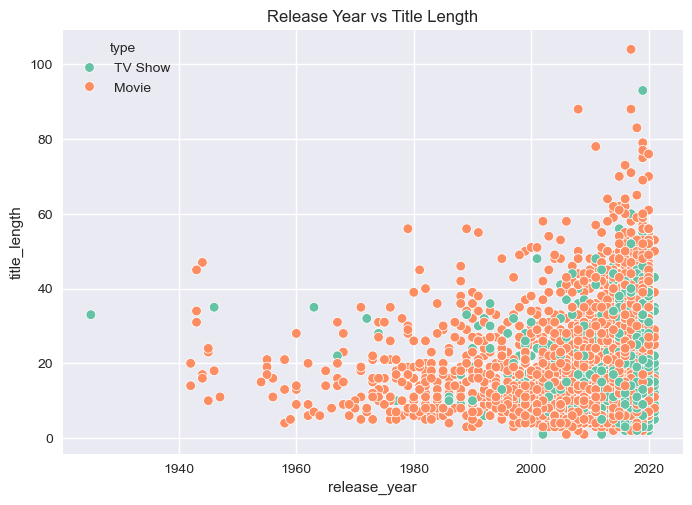

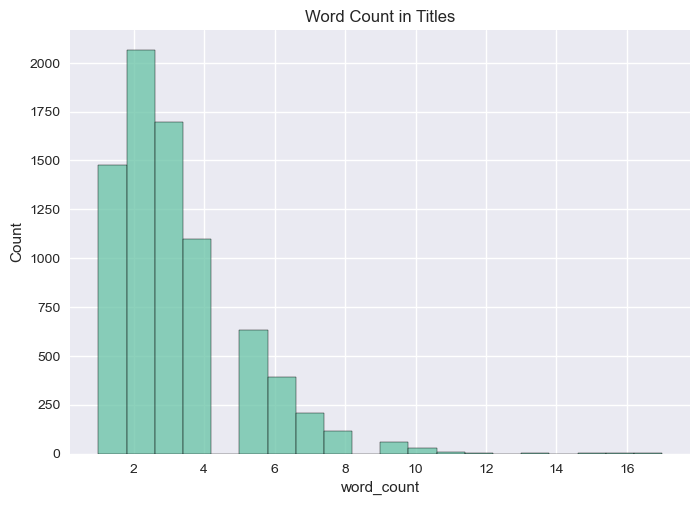

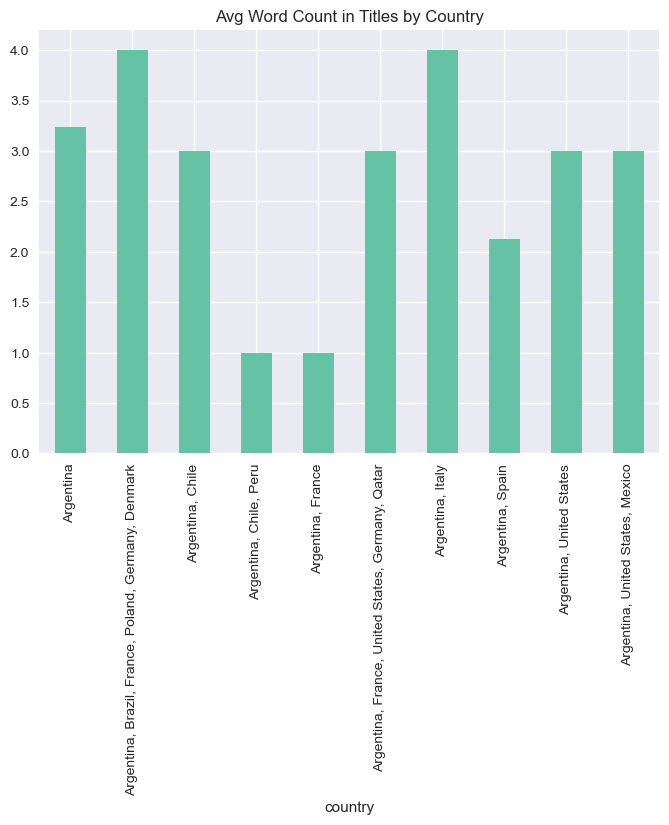

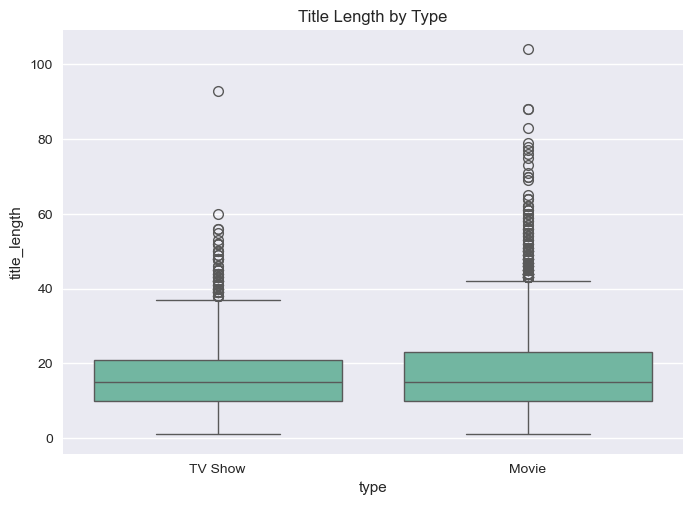

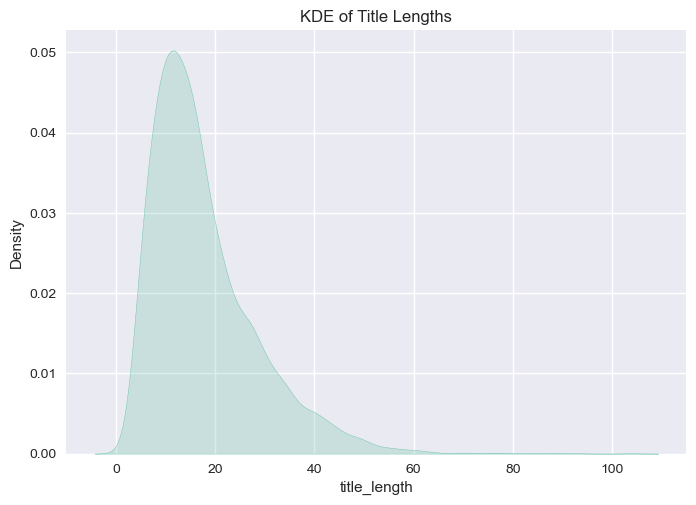

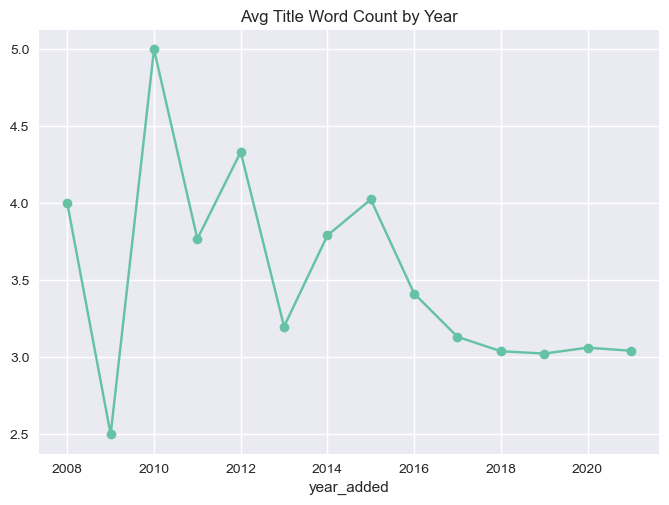

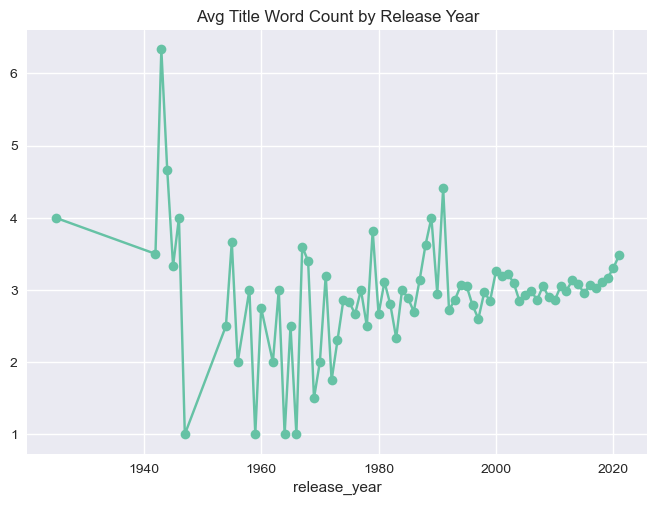

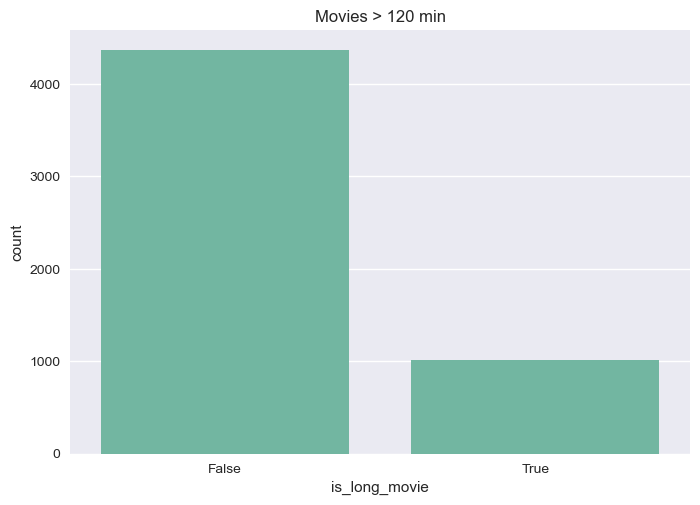

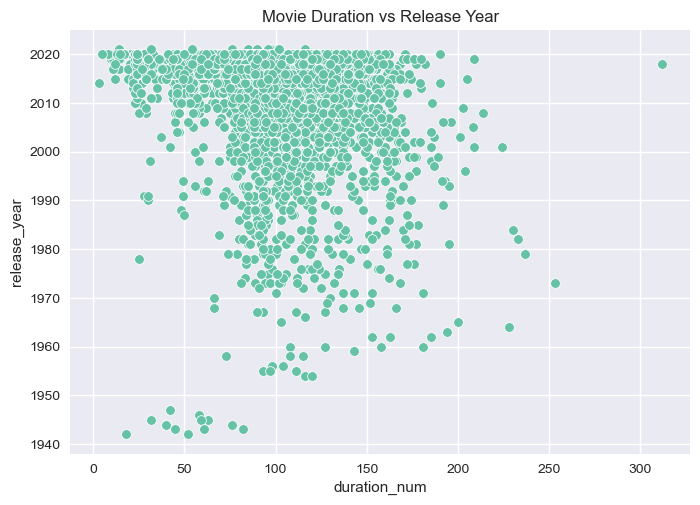

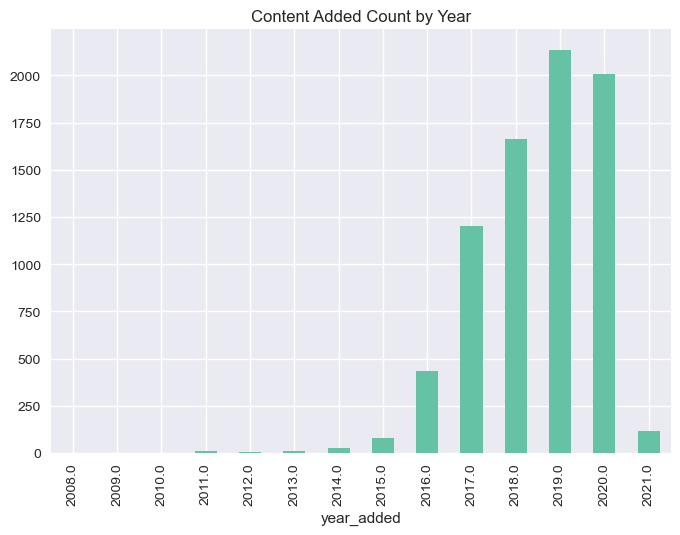

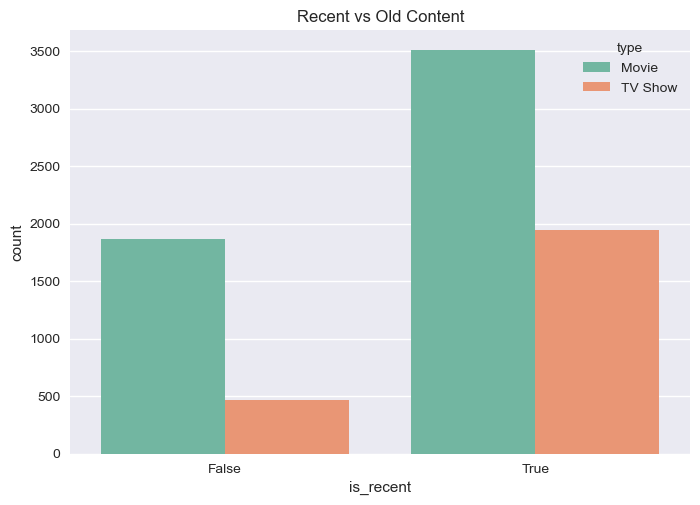

<Figure size 800x550 with 0 Axes>

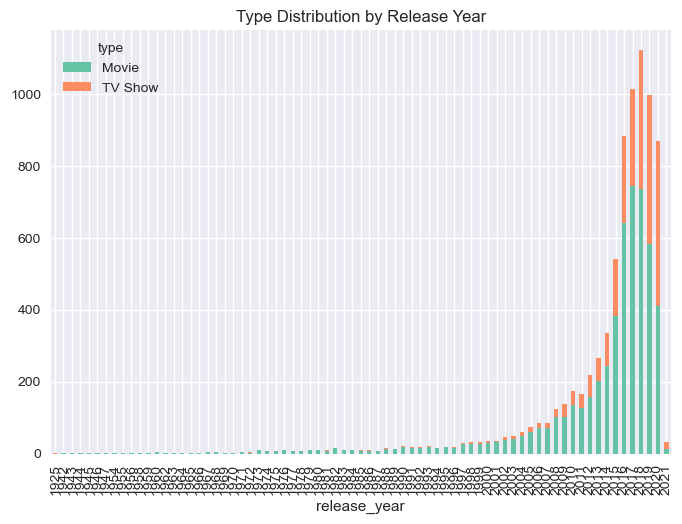

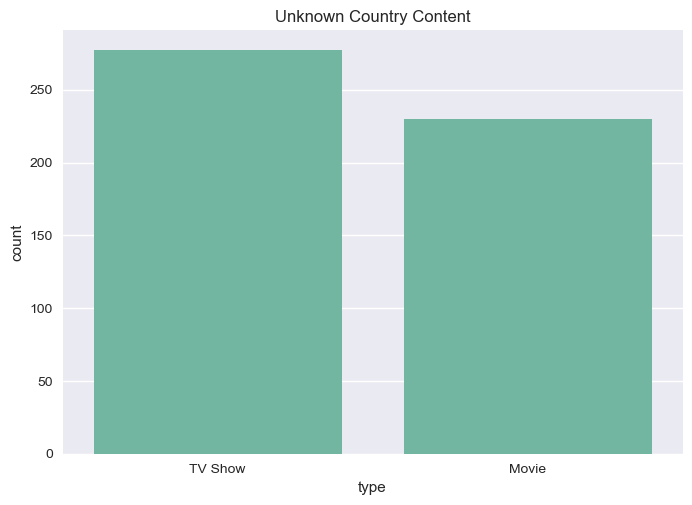

<Figure size 800x550 with 0 Axes>

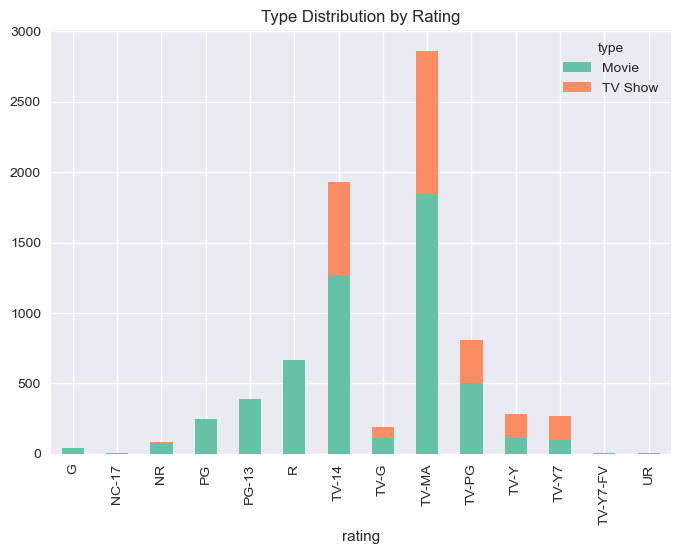

<Figure size 800x550 with 0 Axes>

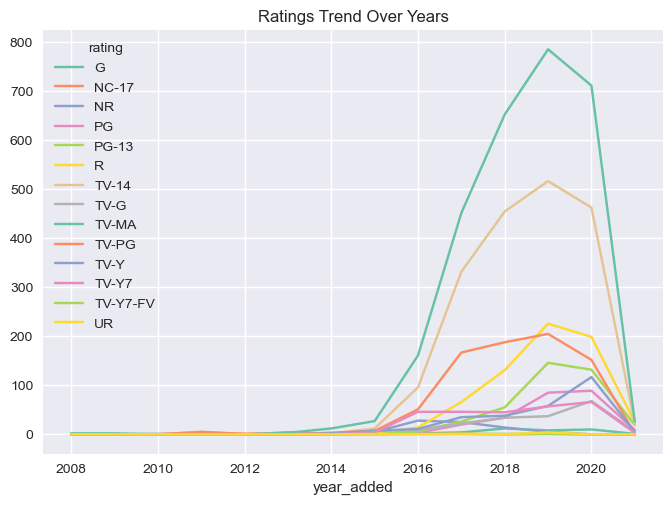

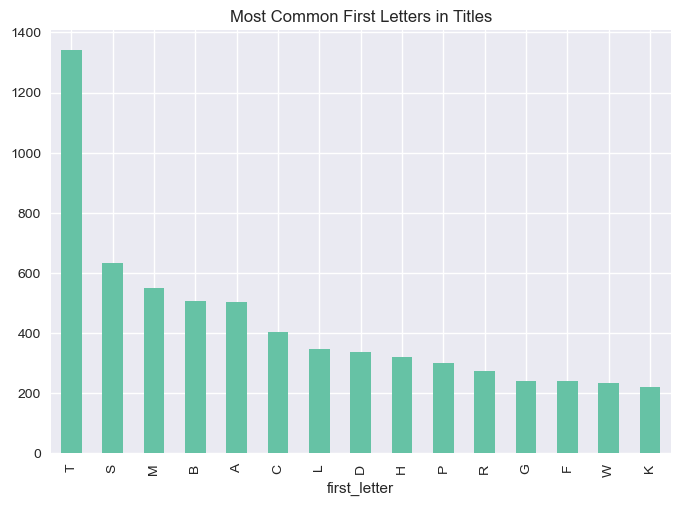

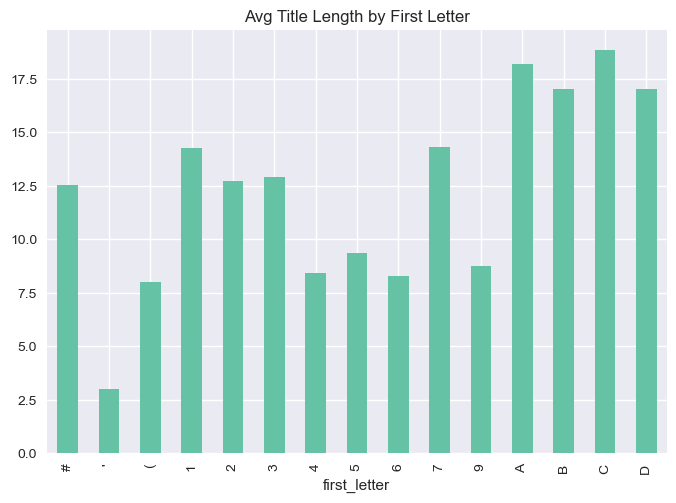

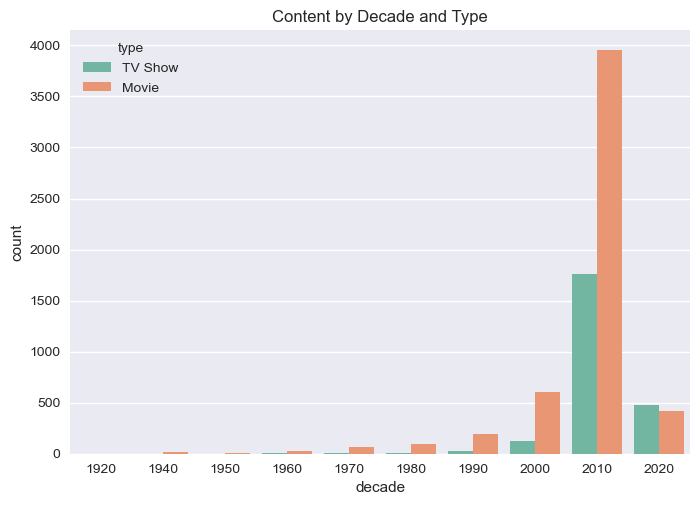

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Load data
url = "https://raw.githubusercontent.com/Somali19/dataset/main/netflix_titles.csv"
df = pd.read_csv(url)

# Preprocessing
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['country'] = df['country'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['title_length'] = df['title'].str.len()

movies = df[df['type']=="Movie"].copy()
movies['duration_num'] = movies['duration'].str.replace(" min","").astype(str)
movies = movies[movies['duration_num'].str.isnumeric()]
movies['duration_num'] = movies['duration_num'].astype(int)

shows = df[df['type']=="TV Show"].copy()
shows['seasons_num'] = shows['duration'].str.replace(" Season","").str.replace("s","").astype(int)

# ---------------------- ANALYSES ----------------------

# Analysis 1
plt.figure(); sns.countplot(data=df, x="type"); plt.title("Movies vs TV Shows"); plt.show()

# Analysis 2
plt.figure(); df['year_added'].value_counts().sort_index().plot(kind="bar"); plt.title("Content Added per Year"); plt.show()

# Analysis 3
plt.figure(); sns.barplot(x=df['country'].value_counts().head(10).values, y=df['country'].value_counts().head(10).index); plt.title("Top 10 Countries"); plt.show()

# Analysis 4
plt.figure(); sns.histplot(movies['duration_num'], bins=30, kde=True); plt.title("Movie Duration Distribution"); plt.show()

# Analysis 5 (removed WordCloud) → skipped

# Analysis 6
plt.figure(); df['release_year'].value_counts().sort_index().plot(kind="line", marker="o"); plt.title("Release Year Distribution"); plt.show()

# Analysis 7
plt.figure(); sns.barplot(x=df['director'].value_counts().head(10).values, y=df['director'].value_counts().head(10).index); plt.title("Top 10 Directors"); plt.show()

# Analysis 8
actors = df['cast'].dropna().str.split(', ').explode().value_counts().head(10)
plt.figure(); sns.barplot(x=actors.values, y=actors.index); plt.title("Top 10 Actors"); plt.show()

# Analysis 9
plt.figure(); sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index); plt.title("Ratings Distribution"); plt.show()

# Analysis 10
plt.figure(); sns.countplot(x="seasons_num", data=shows, order=sorted(shows['seasons_num'].unique())); plt.title("TV Show Seasons Distribution"); plt.show()

# Analysis 11
plt.figure(); df['month_added'].value_counts().sort_index().plot(kind="bar"); plt.title("Content Added by Month"); plt.show()

# Analysis 12
plt.figure(); sns.heatmap(df.pivot_table(index="year_added", columns="month_added", values="show_id", aggfunc="count"), cmap="YlOrRd"); plt.title("Additions Heatmap"); plt.show()

# Analysis 13
plt.figure(); movies.groupby("release_year")['duration_num'].mean().dropna().plot(kind="line", marker="o"); plt.title("Avg Movie Duration by Year"); plt.show()

# Analysis 14
plt.figure(); sns.boxplot(x="type", y="release_year", data=df); plt.title("Release Year Spread"); plt.show()

# Analysis 15
plt.figure(); df.groupby("country")['show_id'].count().sort_values(ascending=False).head(20).plot(kind="bar"); plt.title("Top 20 Countries"); plt.show()

# Analysis 16
plt.figure(); df.groupby("rating")['show_id'].count().plot(kind="bar"); plt.title("Rating Frequency"); plt.show()

# Analysis 17
plt.figure(); sns.countplot(x="year_added", hue="type", data=df); plt.title("Movies vs Shows Added by Year"); plt.show()

# Analysis 18
plt.figure(); df['listed_in'].str.split(',').explode().value_counts().head(15).plot(kind="bar"); plt.title("Top 15 Genres"); plt.show()

# Analysis 19
plt.figure(); movies.groupby("release_year")['duration_num'].mean().plot(kind="bar", color="orange"); plt.title("Avg Movie Length by Release Year"); plt.show()

# Analysis 20
plt.figure(); df.groupby("year_added")['country'].nunique().plot(kind="line", marker="o"); plt.title("Unique Countries Added per Year"); plt.show()

# Analysis 21
plt.figure(); sns.countplot(data=df[df['country']=="India"], x="type"); plt.title("Indian Content"); plt.show()

# Analysis 22
plt.figure(); sns.histplot(shows['seasons_num'], bins=10); plt.title("TV Show Seasons Histogram"); plt.show()

# Analysis 23
plt.figure(); df.groupby("type")['release_year'].mean().plot(kind="bar"); plt.title("Avg Release Year by Type"); plt.show()

# Analysis 24
plt.figure(); df.groupby("year_added")['show_id'].count().cumsum().plot(kind="line", marker="o"); plt.title("Cumulative Growth"); plt.show()

# Analysis 25
plt.figure(); sns.violinplot(x="type", y="release_year", data=df); plt.title("Release Year by Type (Violin)"); plt.show()

# Analysis 26
plt.figure(); sns.histplot(df['title_length'], bins=30, kde=True); plt.title("Title Length Distribution"); plt.show()

# Analysis 27
plt.figure(); sns.boxplot(y="duration_num", data=movies); plt.title("Boxplot of Movie Durations"); plt.show()

# Analysis 28
plt.figure(); movies.groupby("country")['duration_num'].mean().head(15).plot(kind="bar"); plt.title("Avg Duration by Country"); plt.show()

# Analysis 29
plt.figure(); df.groupby("year_added")['rating'].nunique().plot(kind="line", marker="o"); plt.title("Unique Ratings per Year"); plt.show()

# Analysis 30
plt.figure(); sns.countplot(data=df[df['country']=="United States"], x="type"); plt.title("US Content"); plt.show()

# Analysis 31
plt.figure(); df.groupby("month_added")['show_id'].count().plot(kind="line", marker="o"); plt.title("Content by Month"); plt.show()

# Analysis 32
plt.figure(); df.groupby("release_year")['show_id'].count().plot(kind="bar"); plt.title("Releases by Year"); plt.show()

# Analysis 33
plt.figure(); df.groupby("year_added")['type'].value_counts().unstack().plot(kind="bar", stacked=True); plt.title("Movies vs Shows Each Year"); plt.show()

# Analysis 34
plt.figure(); df.groupby("country")['show_id'].count().head(15).plot(kind="pie", autopct='%1.0f%%'); plt.title("Top Countries Contribution"); plt.ylabel(""); plt.show()

# Analysis 35
plt.figure(); sns.kdeplot(movies['duration_num'], fill=True); plt.title("KDE of Movie Durations"); plt.show()

# Analysis 36
plt.figure(); df['decade'] = (df['release_year']//10)*10; df['decade'].value_counts().sort_index().plot(kind="bar"); plt.title("Content by Decade"); plt.show()

# Analysis 37
plt.figure(); sns.stripplot(x="type", y="year_added", data=df, jitter=True); plt.title("Content Added Spread"); plt.show()

# Analysis 38
plt.figure(); df.groupby("year_added")['country'].nunique().plot(kind="bar"); plt.title("Unique Countries per Year"); plt.show()

# Analysis 39
plt.figure(); sns.countplot(x="rating", hue="type", data=df, order=df['rating'].value_counts().index); plt.title("Ratings by Type"); plt.show()

# Analysis 40
plt.figure(); sns.histplot(shows['seasons_num'], bins=15); plt.title("TV Show Seasons Histogram"); plt.show()

# Analysis 41
plt.figure(); df.groupby("year_added")['title_length'].mean().plot(kind="line", marker="o"); plt.title("Avg Title Length by Year Added"); plt.show()

# Analysis 42
plt.figure(); df.groupby("release_year")['title_length'].mean().plot(kind="line", marker="o"); plt.title("Avg Title Length by Release Year"); plt.show()

# Analysis 43
plt.figure(); df.groupby("country")['title_length'].mean().head(10).plot(kind="bar"); plt.title("Avg Title Length by Country"); plt.show()

# Analysis 44
plt.figure(); sns.boxplot(x="rating", y="release_year", data=df); plt.title("Release Year by Rating"); plt.show()

# Analysis 45
plt.figure(); df.groupby("rating")['title_length'].mean().plot(kind="bar"); plt.title("Avg Title Length by Rating"); plt.show()

# Analysis 46
plt.figure(); sns.scatterplot(x="release_year", y="title_length", hue="type", data=df); plt.title("Release Year vs Title Length"); plt.show()

# Analysis 47
plt.figure(); df['word_count'] = df['title'].str.split().str.len(); sns.histplot(df['word_count'], bins=20); plt.title("Word Count in Titles"); plt.show()

# Analysis 48
plt.figure(); df.groupby("country")['word_count'].mean().head(10).plot(kind="bar"); plt.title("Avg Word Count in Titles by Country"); plt.show()

# Analysis 49
plt.figure(); sns.boxplot(x="type", y="title_length", data=df); plt.title("Title Length by Type"); plt.show()

# Analysis 50
plt.figure(); sns.kdeplot(df['title_length'], fill=True); plt.title("KDE of Title Lengths"); plt.show()

# Analysis 51
plt.figure(); df.groupby("year_added")['word_count'].mean().plot(kind="line", marker="o"); plt.title("Avg Title Word Count by Year"); plt.show()

# Analysis 52
plt.figure(); df.groupby("release_year")['word_count'].mean().plot(kind="line", marker="o"); plt.title("Avg Title Word Count by Release Year"); plt.show()

# Analysis 53
# Analysis 53 (fixed)
movies['is_long_movie'] = movies['duration_num'] > 120
plt.figure()
sns.countplot(x="is_long_movie", data=movies)
plt.title("Movies > 120 min")
plt.show()


# Analysis 54
plt.figure(); sns.scatterplot(x="duration_num", y="release_year", data=movies); plt.title("Movie Duration vs Release Year"); plt.show()

# Analysis 55
plt.figure(); df.groupby("year_added")['duration'].count().plot(kind="bar"); plt.title("Content Added Count by Year"); plt.show()

# Analysis 56
plt.figure(); df['is_recent'] = df['release_year'] >= 2015; sns.countplot(x="is_recent", hue="type", data=df); plt.title("Recent vs Old Content"); plt.show()

# Analysis 57
plt.figure(); df.groupby("release_year")['type'].value_counts().unstack().plot(kind="bar", stacked=True); plt.title("Type Distribution by Release Year"); plt.show()

# Analysis 58
plt.figure(); sns.countplot(data=df[df['country']=="Unknown"], x="type"); plt.title("Unknown Country Content"); plt.show()

# Analysis 59
plt.figure(); df.groupby("rating")['type'].value_counts().unstack().plot(kind="bar", stacked=True); plt.title("Type Distribution by Rating"); plt.show()

# Analysis 60
plt.figure(); df.groupby("year_added")['rating'].value_counts().unstack().fillna(0).plot(kind="line"); plt.title("Ratings Trend Over Years"); plt.show()

# Analysis 61
plt.figure(); df['first_letter'] = df['title'].str[0]; df['first_letter'].value_counts().head(15).plot(kind="bar"); plt.title("Most Common First Letters in Titles"); plt.show()

# Analysis 62
plt.figure(); df.groupby("first_letter")['title_length'].mean().head(15).plot(kind="bar"); plt.title("Avg Title Length by First Letter"); plt.show()

# Analysis 63
plt.figure(); sns.countplot(x="decade", hue="type", data=df); plt.title("Content by Decade and Type"); plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Load dataset
url = "https://raw.githubusercontent.com/Somali19/dataset/main/netflix_titles.csv"
df = pd.read_csv(url)



In [2]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Preprocessing

In [3]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['country'] = df['country'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['title_length'] = df['title'].str.len()


In [4]:
movies = df[df['type']=="Movie"].copy()
movies['duration_num'] = movies['duration'].str.replace(" min","").astype(str)
movies = movies[movies['duration_num'].str.isnumeric()]
movies['duration_num'] = movies['duration_num'].astype(int)

shows = df[df['type']=="TV Show"].copy()
shows['seasons_num'] = shows['duration'].str.replace(" Season","").str.replace("s","").astype(int)

### Comparing Movies vs TV Shows count

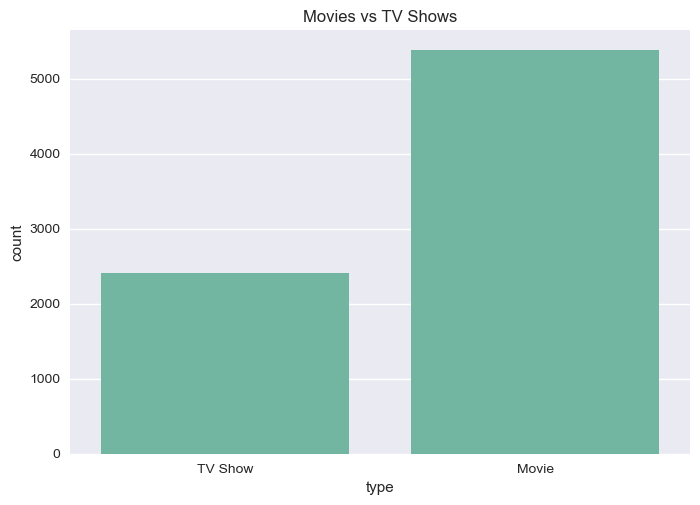

In [5]:
plt.figure(); sns.countplot(data=df, x="type"); plt.title("Movies vs TV Shows"); plt.show()

### Content growth trend by year added

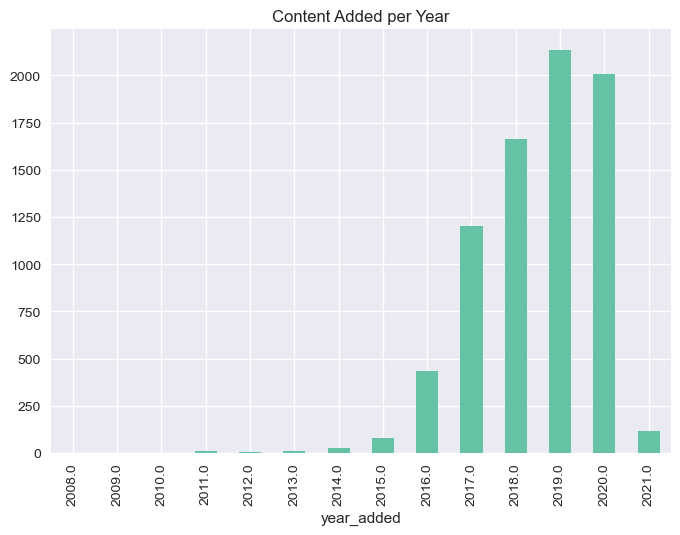

In [6]:
plt.figure(); df['year_added'].value_counts().sort_index().plot(kind="bar"); plt.title("Content Added per Year"); plt.show()

### Top 10 countries producing most Netflix content

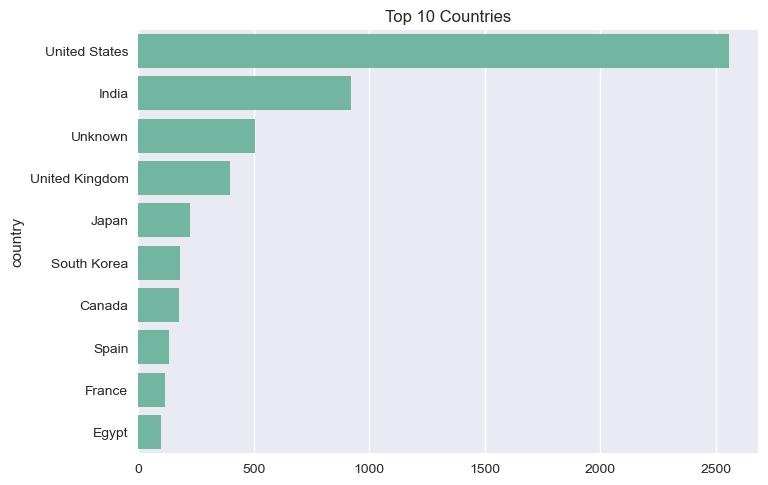

In [7]:
plt.figure(); sns.barplot(x=df['country'].value_counts().head(10).values, y=df['country'].value_counts().head(10).index); plt.title("Top 10 Countries"); plt.show()

### Distribution of movie durations

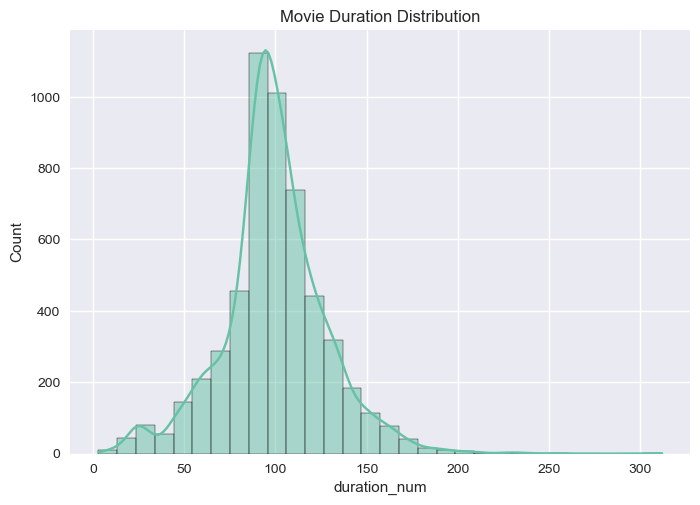

In [8]:
plt.figure(); sns.histplot(movies['duration_num'], bins=30, kde=True); plt.title("Movie Duration Distribution"); plt.show()

### Distribution of movie durations

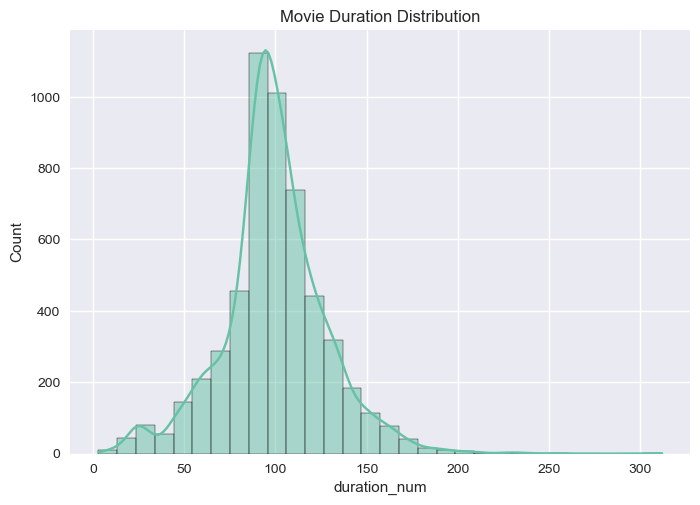

In [9]:
plt.figure(); sns.histplot(movies['duration_num'], bins=30, kde=True); plt.title("Movie Duration Distribution"); plt.show()

### Content release year distribution

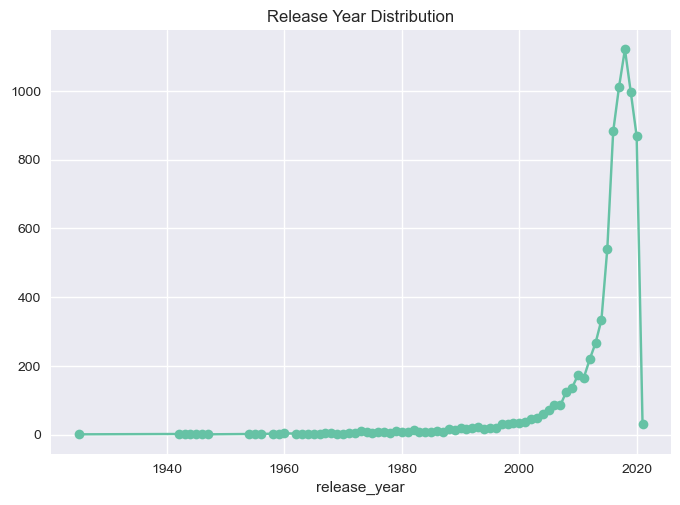

In [10]:
plt.figure(); df['release_year'].value_counts().sort_index().plot(kind="line", marker="o"); plt.title("Release Year Distribution"); plt.show()

### Top 10 directors with most titles

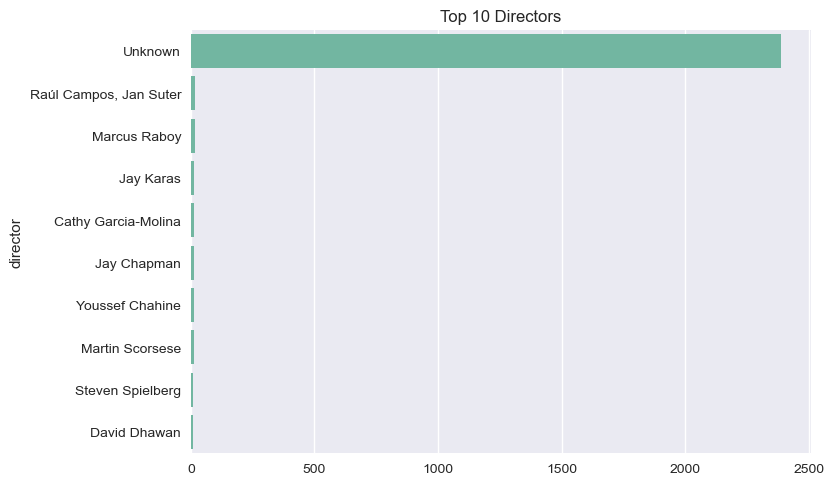

In [11]:
plt.figure(); sns.barplot(x=df['director'].value_counts().head(10).values, y=df['director'].value_counts().head(10).index); plt.title("Top 10 Directors"); plt.show()

### Ratings distribution of Netflix titles

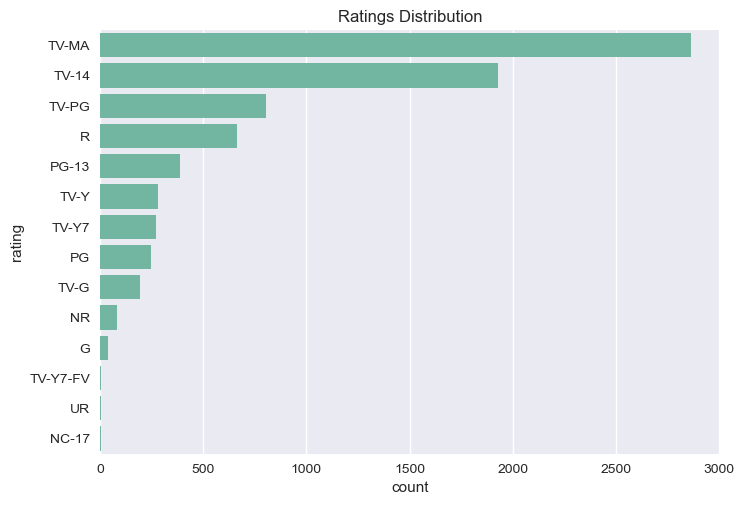

In [12]:
plt.figure(); sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index); plt.title("Ratings Distribution"); plt.show()

### Seasons distribution in TV Shows

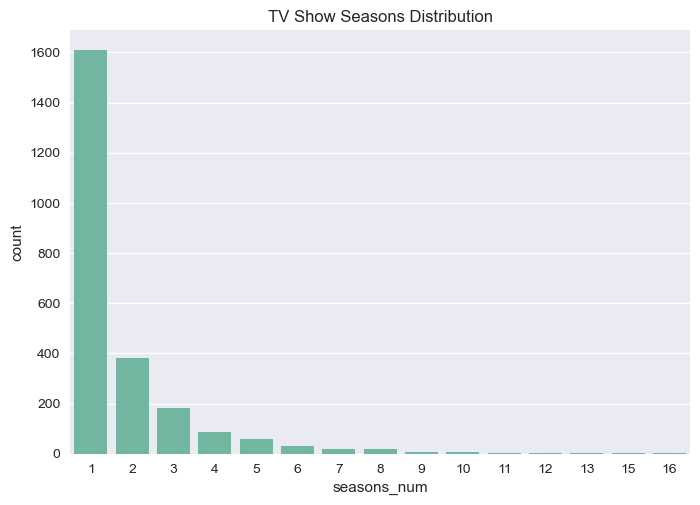

In [13]:
plt.figure(); sns.countplot(x="seasons_num", data=shows, order=sorted(shows['seasons_num'].unique())); plt.title("TV Show Seasons Distribution"); plt.show()


### Content additions by month

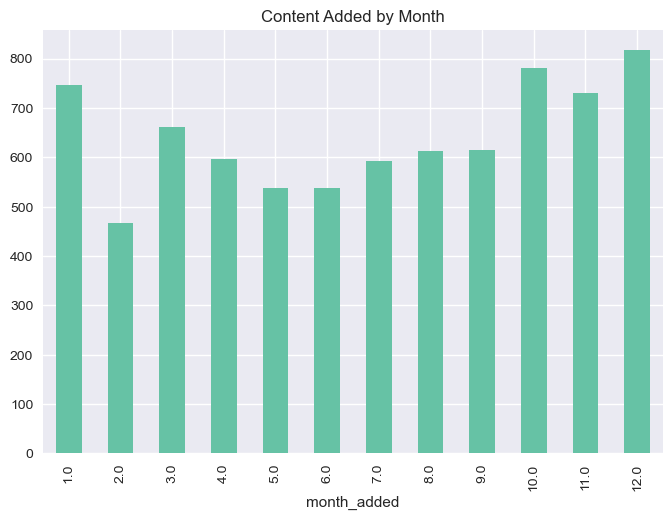

In [14]:
plt.figure(); df['month_added'].value_counts().sort_index().plot(kind="bar"); plt.title("Content Added by Month"); plt.show()

### Average movie duration trend over years

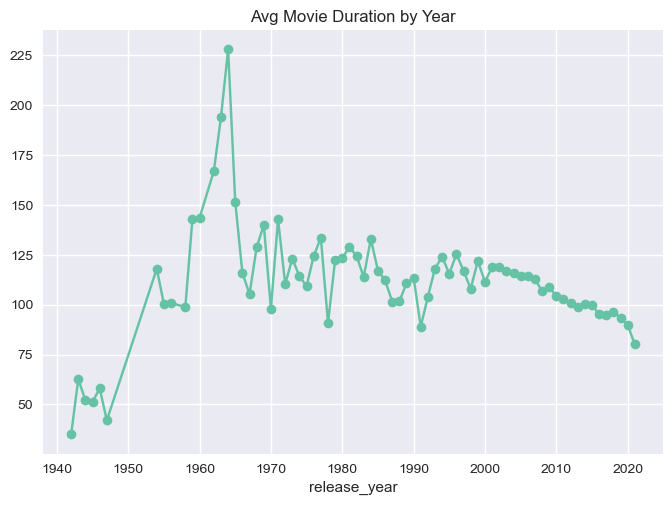

In [15]:
plt.figure(); movies.groupby("release_year")['duration_num'].mean().dropna().plot(kind="line", marker="o"); plt.title("Avg Movie Duration by Year"); plt.show()


### Spread of release years by type

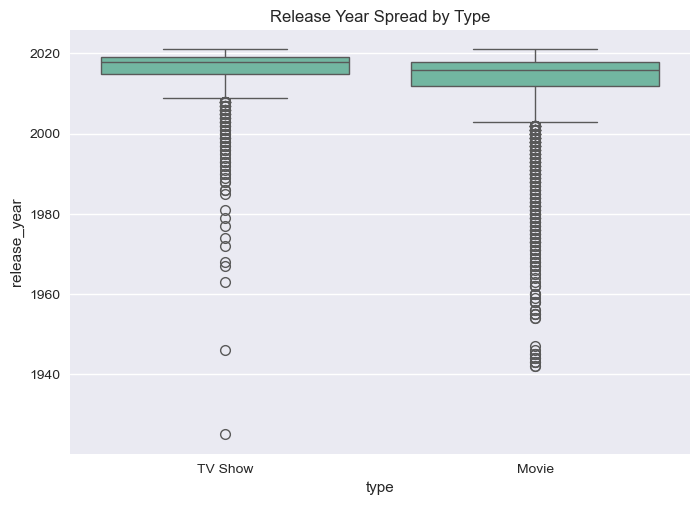

In [16]:
plt.figure(); sns.boxplot(x="type", y="release_year", data=df); plt.title("Release Year Spread by Type"); plt.show()


### Top 20 countries with the most titles

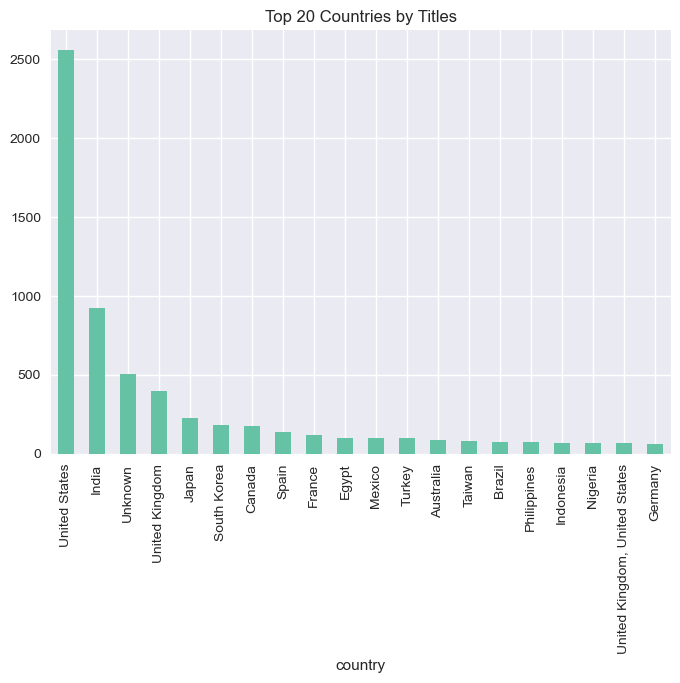

In [17]:
plt.figure(); df.groupby("country")['show_id'].count().sort_values(ascending=False).head(20).plot(kind="bar"); plt.title("Top 20 Countries by Titles"); plt.show()

### Frequency of ratings across all titles

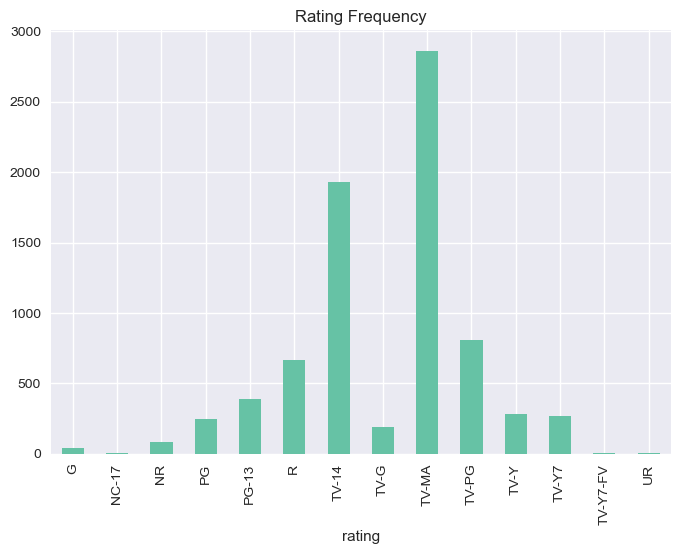

In [18]:
plt.figure(); df.groupby("rating")['show_id'].count().plot(kind="bar"); plt.title("Rating Frequency"); plt.show()



### Movies vs TV Shows added each year

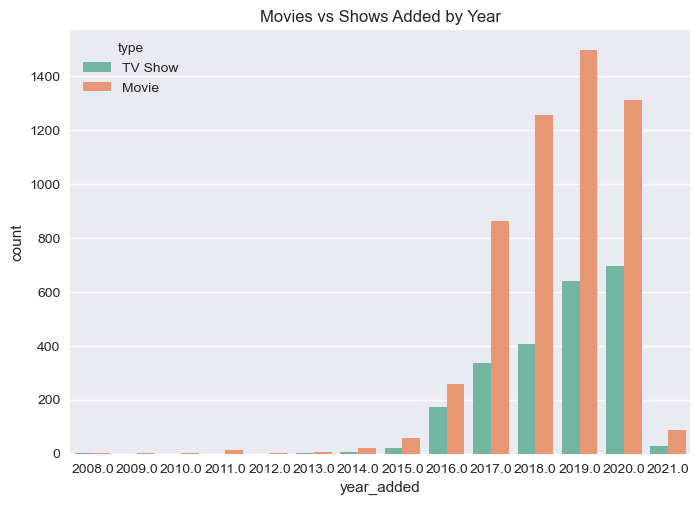

In [19]:
plt.figure(); sns.countplot(x="year_added", hue="type", data=df); plt.title("Movies vs Shows Added by Year"); plt.show()


### Top 15 most common genres

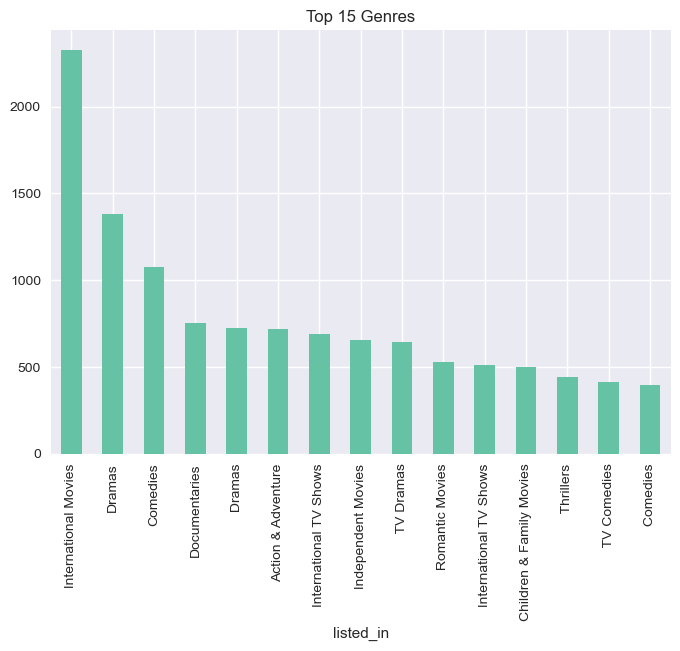

In [20]:
plt.figure(); df['listed_in'].str.split(',').explode().value_counts().head(15).plot(kind="bar"); plt.title("Top 15 Genres"); plt.show()

### Average movie length by release year

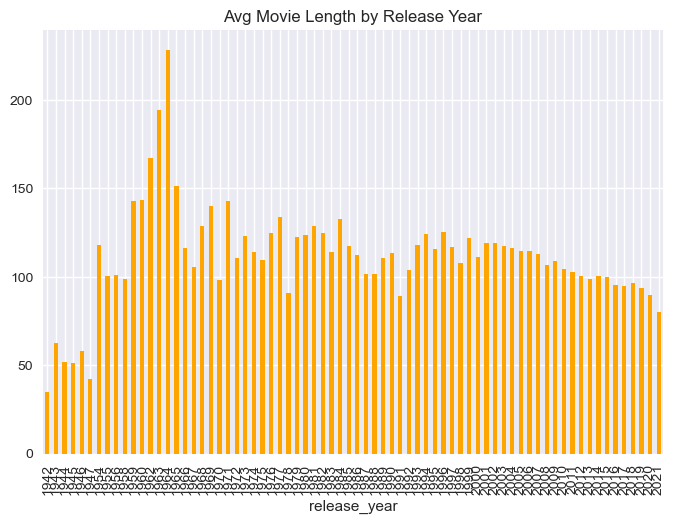

In [21]:
plt.figure(); movies.groupby("release_year")['duration_num'].mean().plot(kind="bar", color="orange"); plt.title("Avg Movie Length by Release Year"); plt.show()


### Unique countries added each year

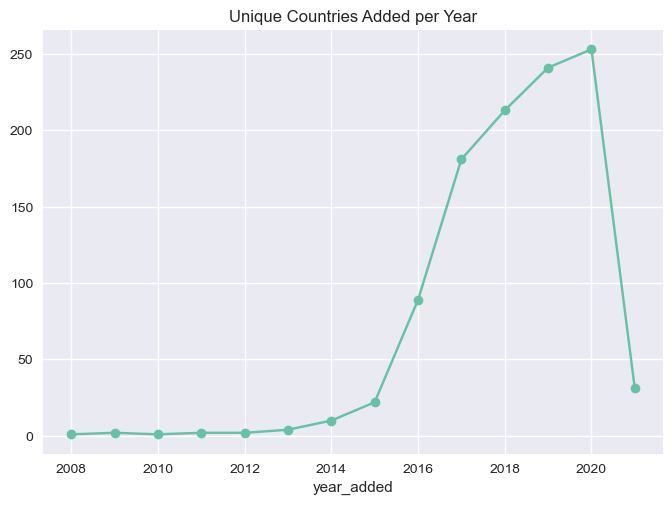

In [22]:
plt.figure(); df.groupby("year_added")['country'].nunique().plot(kind="line", marker="o"); plt.title("Unique Countries Added per Year"); plt.show()

### Indian content split between Movies and Shows

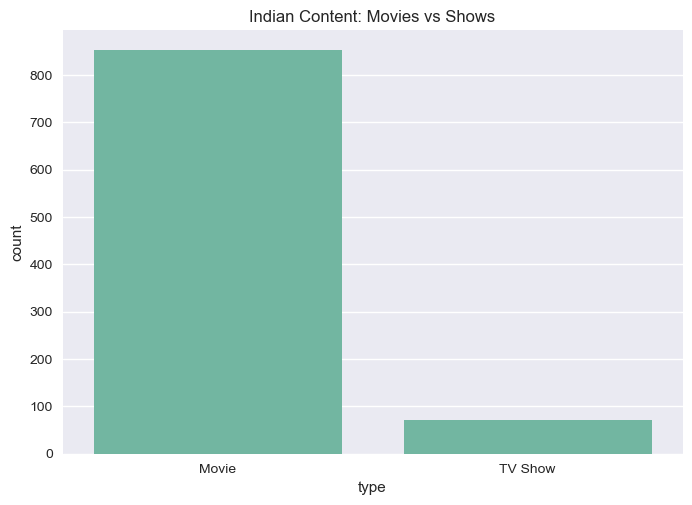

In [23]:
plt.figure(); sns.countplot(data=df[df['country']=="India"], x="type"); plt.title("Indian Content: Movies vs Shows"); plt.show()


### Histogram of TV Show seasons


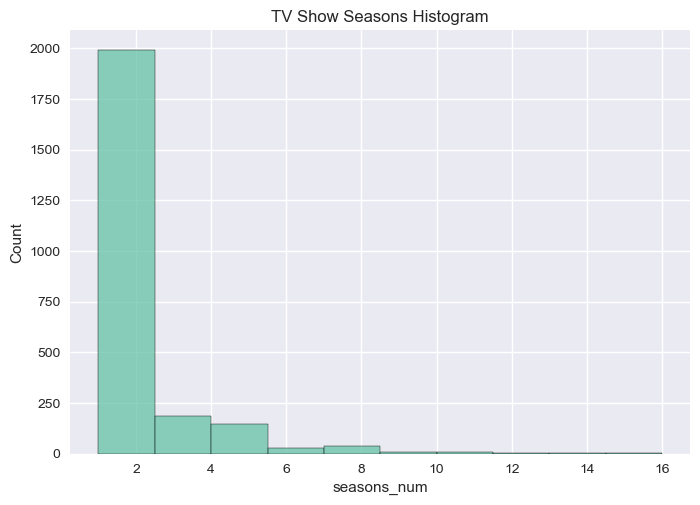

In [24]:
plt.figure(); sns.histplot(shows['seasons_num'], bins=10); plt.title("TV Show Seasons Histogram"); plt.show()

### Average release year by type

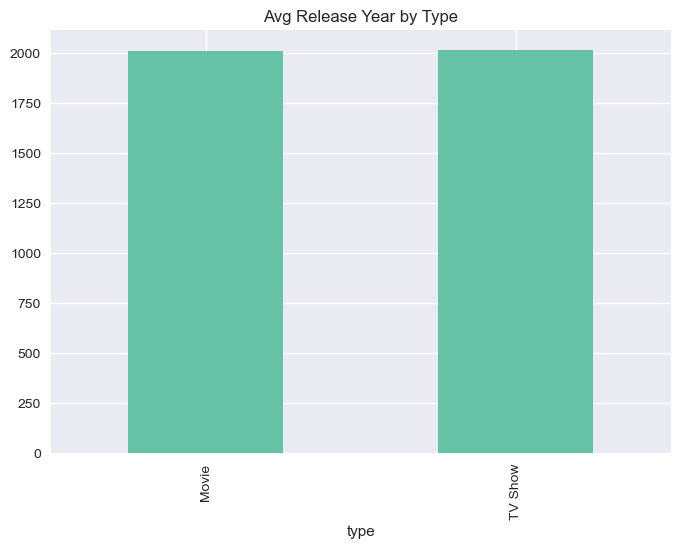

In [25]:
plt.figure(); df.groupby("type")['release_year'].mean().plot(kind="bar"); plt.title("Avg Release Year by Type"); plt.show()

### Cumulative growth of Netflix content

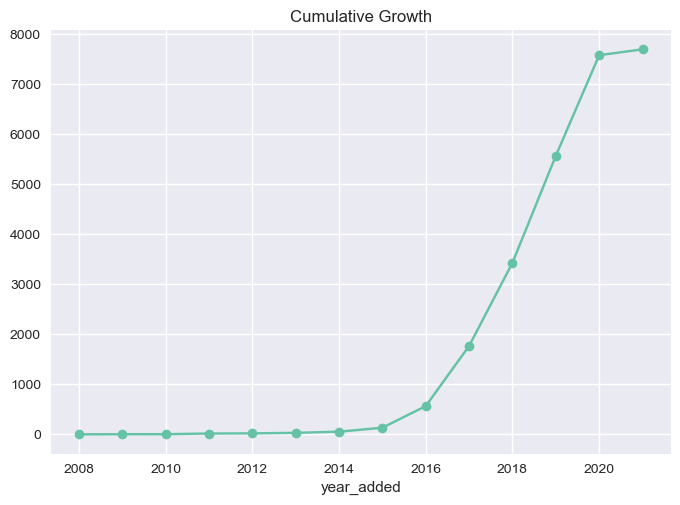

In [26]:
plt.figure(); df.groupby("year_added")['show_id'].count().cumsum().plot(kind="line", marker="o"); plt.title("Cumulative Growth"); plt.show()

### Violin plot of release years by type

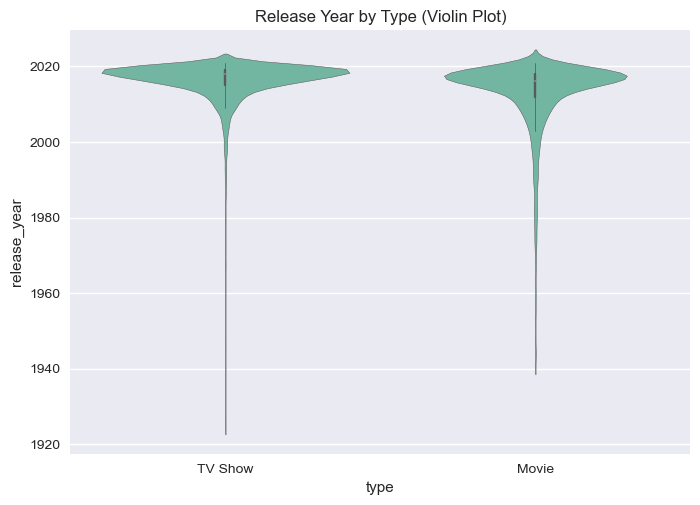

In [27]:
plt.figure(); sns.violinplot(x="type", y="release_year", data=df); plt.title("Release Year by Type (Violin Plot)"); plt.show()


### Distribution of title lengths

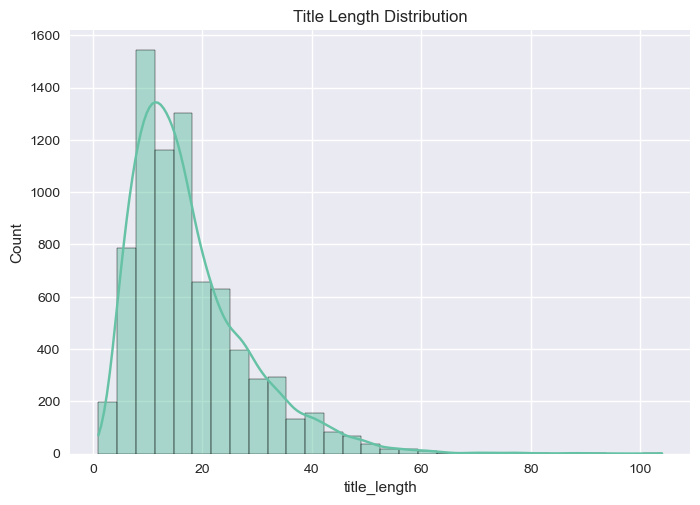

In [28]:
plt.figure(); sns.histplot(df['title_length'], bins=30, kde=True); plt.title("Title Length Distribution"); plt.show()


### Boxplot of movie durations

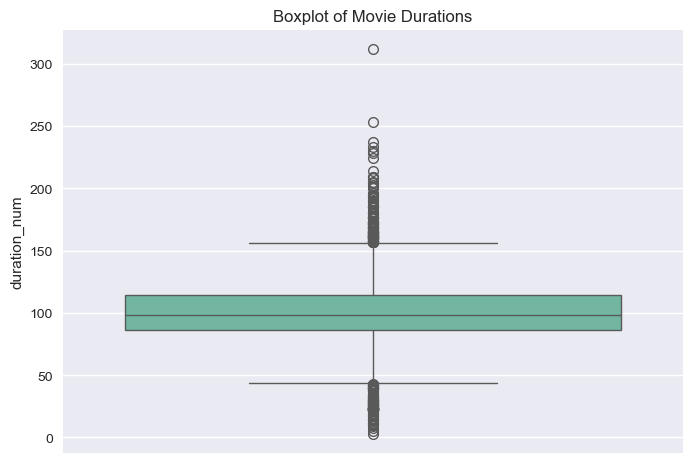

In [29]:
plt.figure(); sns.boxplot(y="duration_num", data=movies); plt.title("Boxplot of Movie Durations"); plt.show()


### Average movie duration by country

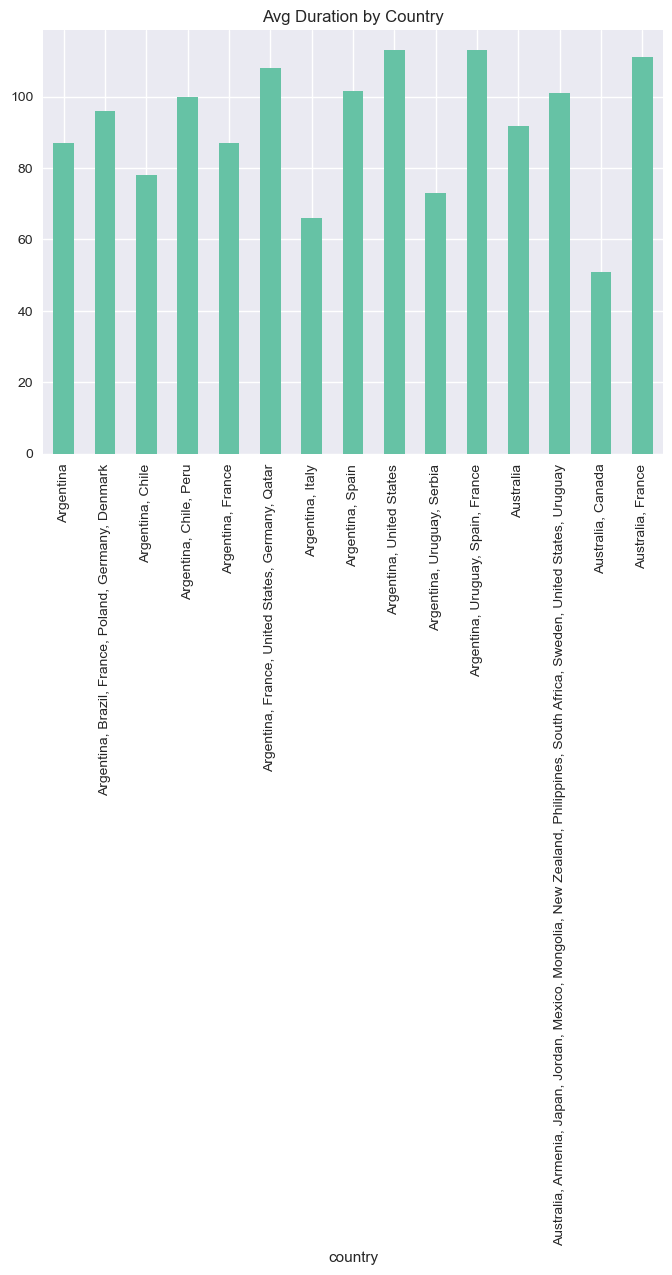

In [30]:
plt.figure(); movies.groupby("country")['duration_num'].mean().head(15).plot(kind="bar"); plt.title("Avg Duration by Country"); plt.show()


### Unique ratings count per year

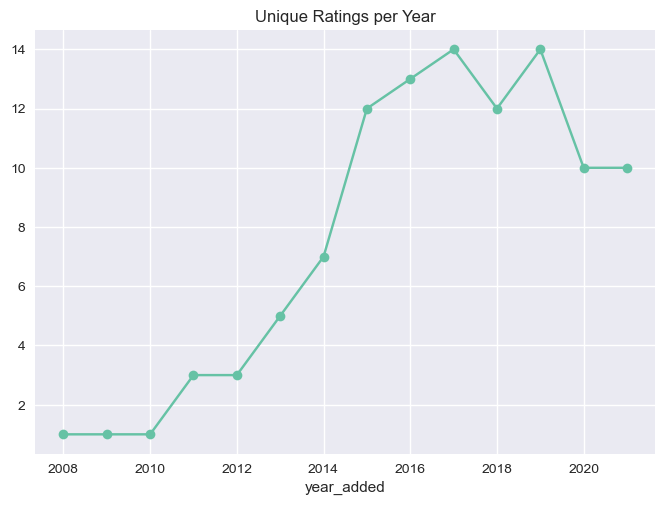

In [31]:
plt.figure(); df.groupby("year_added")['rating'].nunique().plot(kind="line", marker="o"); plt.title("Unique Ratings per Year"); plt.show()


### US content split between Movies and Shows

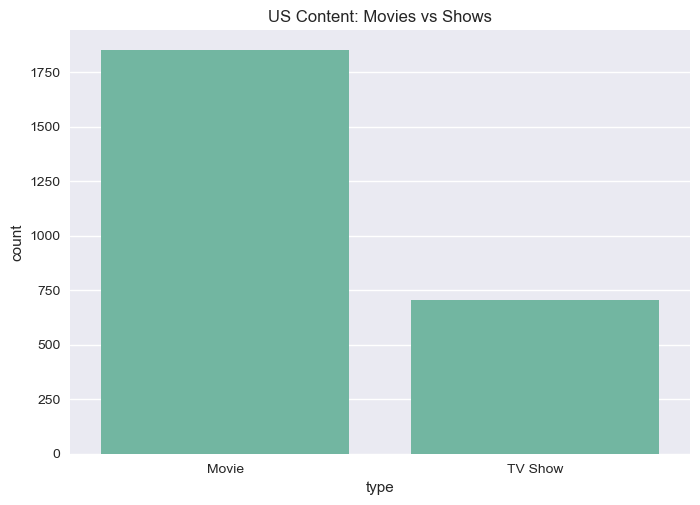

In [32]:
plt.figure(); sns.countplot(data=df[df['country']=="United States"], x="type"); plt.title("US Content: Movies vs Shows"); plt.show()

### Content additions by month (line chart)

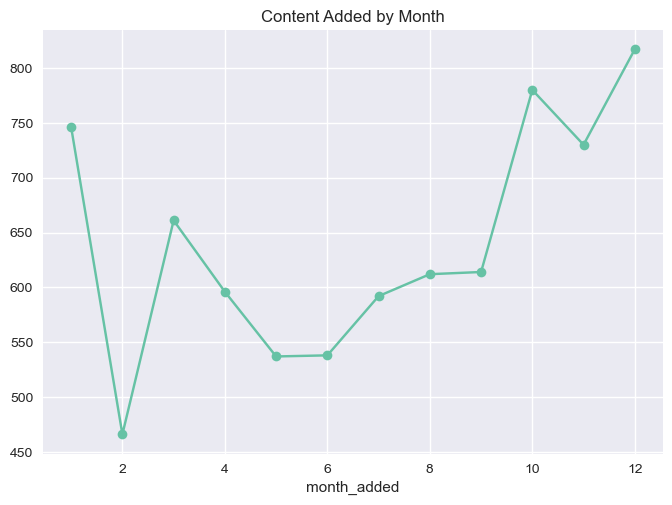

In [33]:
plt.figure(); df.groupby("month_added")['show_id'].count().plot(kind="line", marker="o"); plt.title("Content Added by Month"); plt.show()

### Content release counts by year

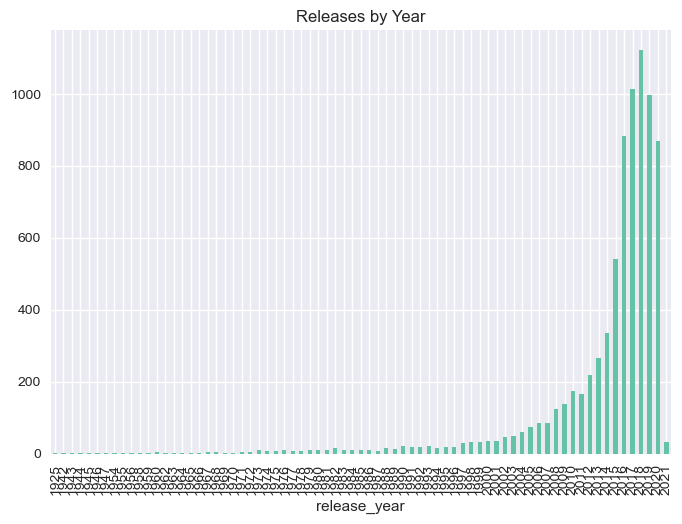

In [34]:
plt.figure(); df.groupby("release_year")['show_id'].count().plot(kind="bar"); plt.title("Releases by Year"); plt.show()

### Movies vs Shows stacked bar by year

<Figure size 800x550 with 0 Axes>

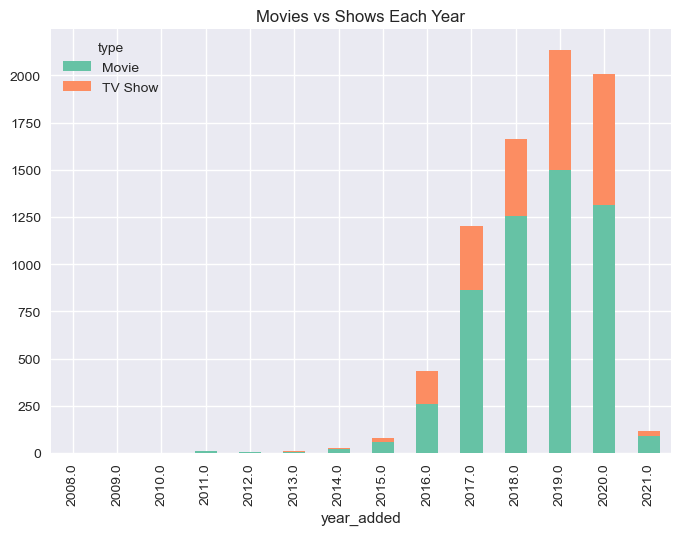

In [35]:
plt.figure(); df.groupby("year_added")['type'].value_counts().unstack().plot(kind="bar", stacked=True); plt.title("Movies vs Shows Each Year"); plt.show()

### Contribution of top 15 countries (pie chart)

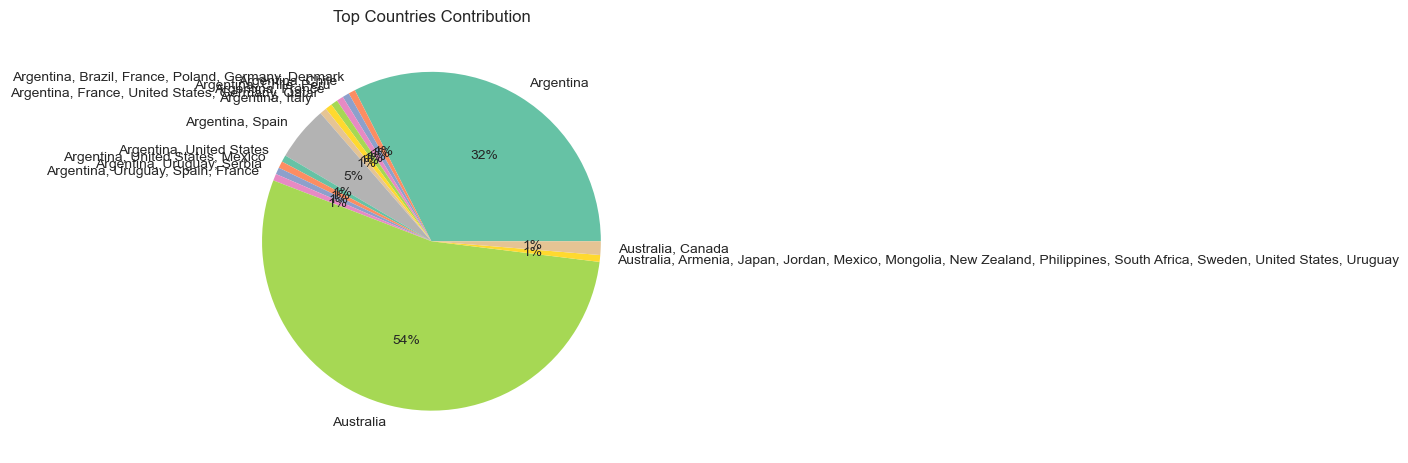

In [40]:
plt.figure(); df.groupby("country")['show_id'].count().head(15).plot(kind="pie", autopct='%1.0f%%'); plt.title("Top Countries Contribution"); plt.ylabel(""); plt.show()

### KDE distribution of movie durations

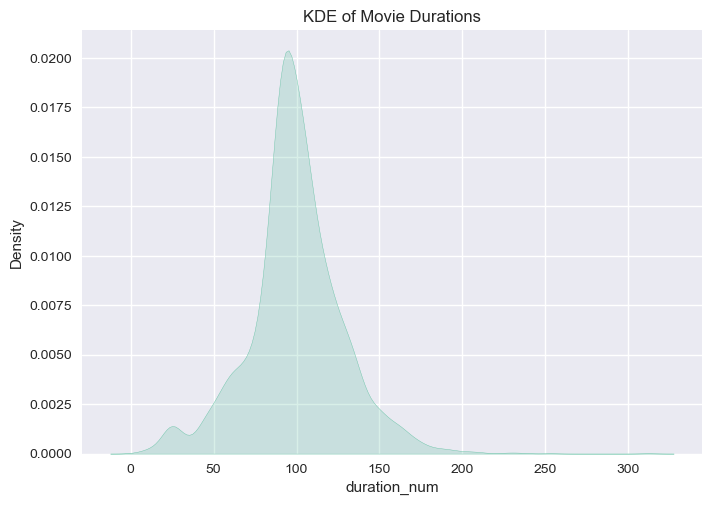

In [41]:
plt.figure(); sns.kdeplot(movies['duration_num'], fill=True); plt.title("KDE of Movie Durations"); plt.show()

### Content grouped by decade

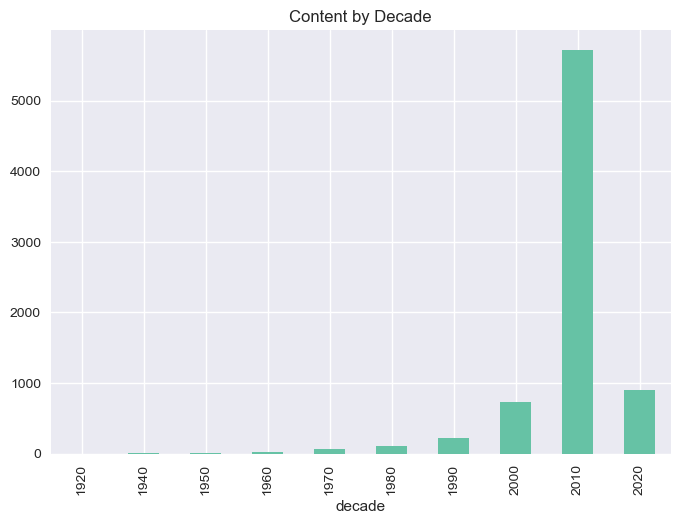

In [42]:
plt.figure(); df['decade'] = (df['release_year']//10)*10; df['decade'].value_counts().sort_index().plot(kind="bar"); plt.title("Content by Decade"); plt.show()

### Spread of content additions by year

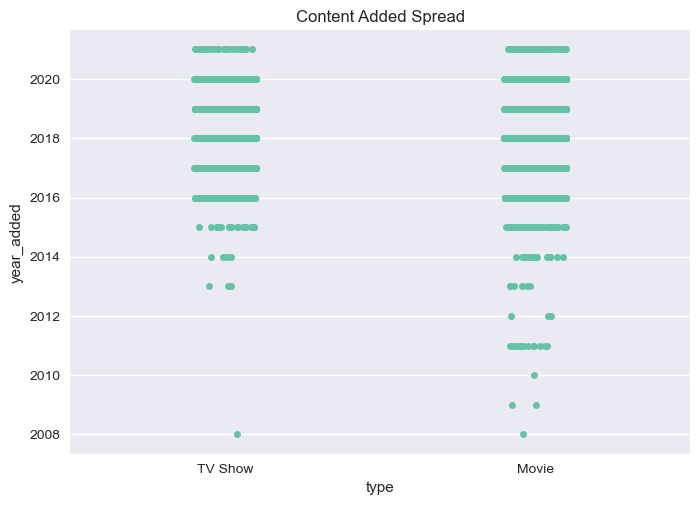

In [43]:
plt.figure(); sns.stripplot(x="type", y="year_added", data=df, jitter=True); plt.title("Content Added Spread"); plt.show()


### Unique countries count each year

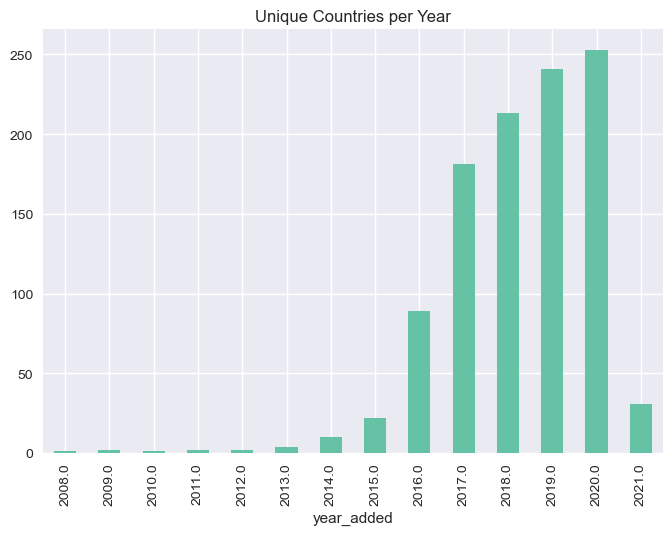

In [44]:
plt.figure(); df.groupby("year_added")['country'].nunique().plot(kind="bar"); plt.title("Unique Countries per Year"); plt.show()


### Ratings distribution split by type

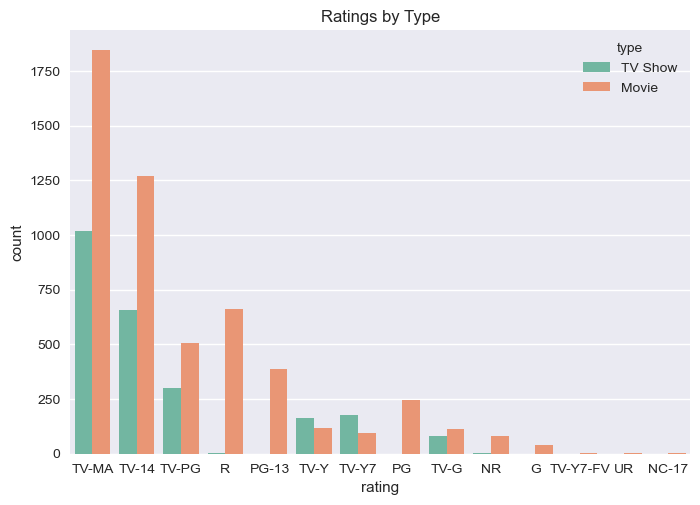

In [45]:
plt.figure(); sns.countplot(x="rating", hue="type", data=df, order=df['rating'].value_counts().index); plt.title("Ratings by Type"); plt.show()

### Histogram of TV show seasons

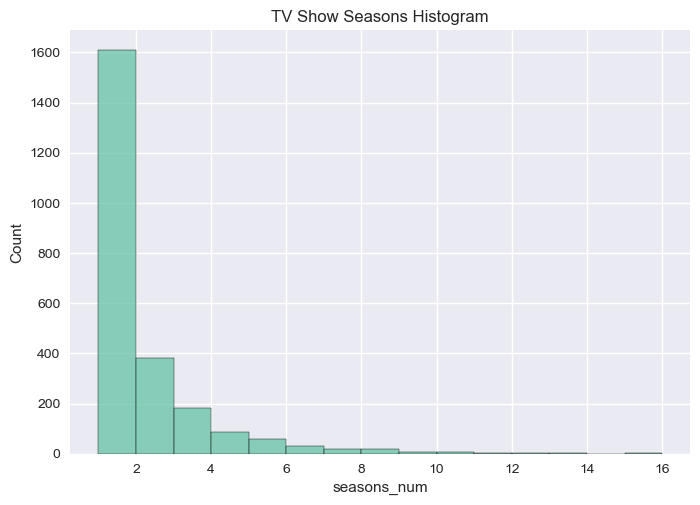

In [46]:
plt.figure(); sns.histplot(shows['seasons_num'], bins=15); plt.title("TV Show Seasons Histogram"); plt.show()

### Average title length by year added

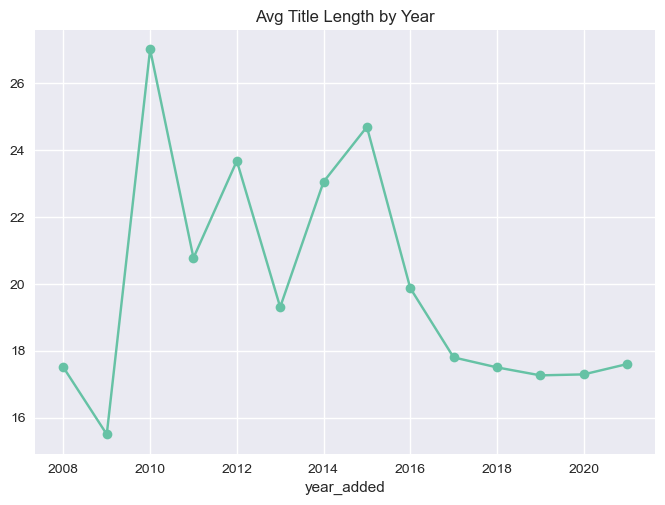

In [47]:
plt.figure(); df.groupby("year_added")['title_length'].mean().plot(kind="line", marker="o"); plt.title("Avg Title Length by Year"); plt.show()
